___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

#### Load Dataset

In [187]:
df = pd.read_csv('Mall_Customers.csv')

In [188]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [189]:
df.rename(columns = {'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending Score'}, inplace = True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [190]:
df.shape

(200, 5)

In [191]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending Score    0
dtype: int64

In [192]:
df.duplicated().sum()

0

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [194]:
df.dtypes

CustomerID         int64
Gender            object
Age                int64
Annual_Income      int64
Spending Score     int64
dtype: object

In [195]:
df.describe()

,CustomerID,Age,Annual_Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [196]:
df.nunique()

CustomerID        200
Gender              2
Age                51
Annual_Income      64
Spending Score     84
dtype: int64

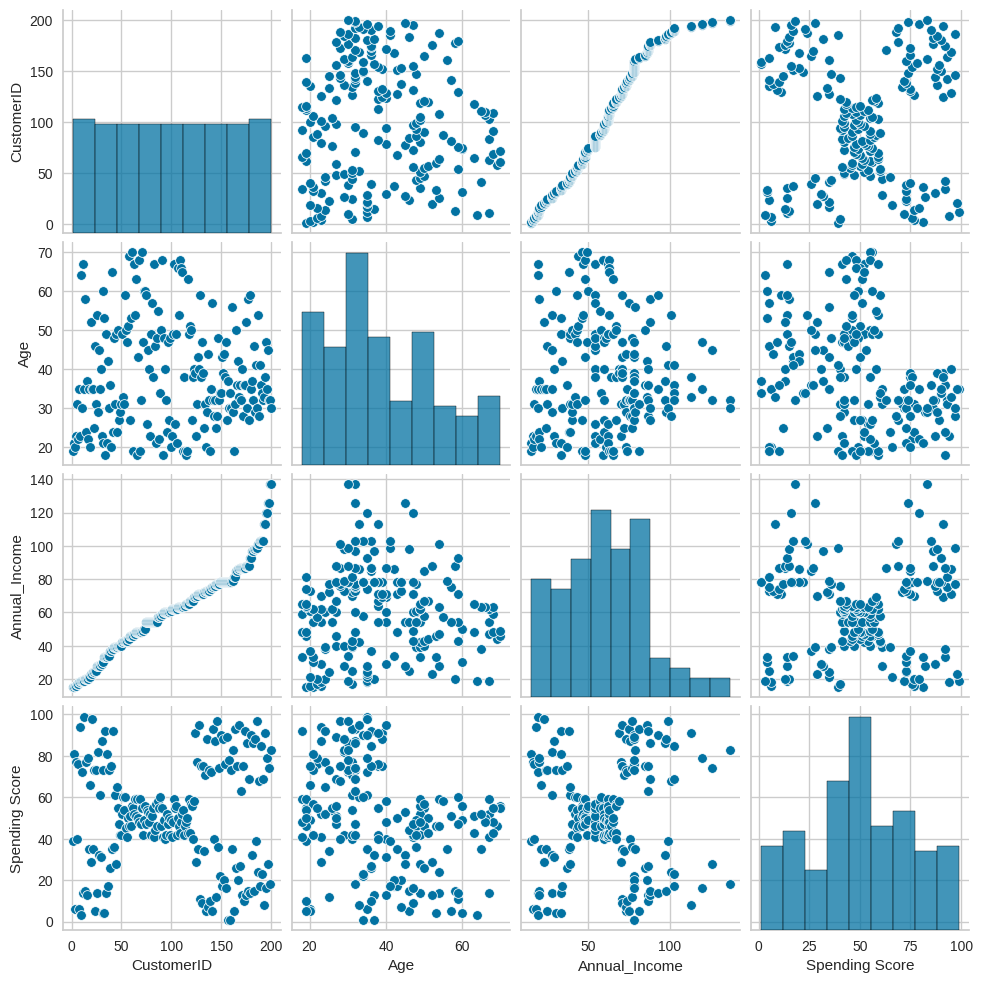

In [197]:
sns.pairplot(df)
plt.show()

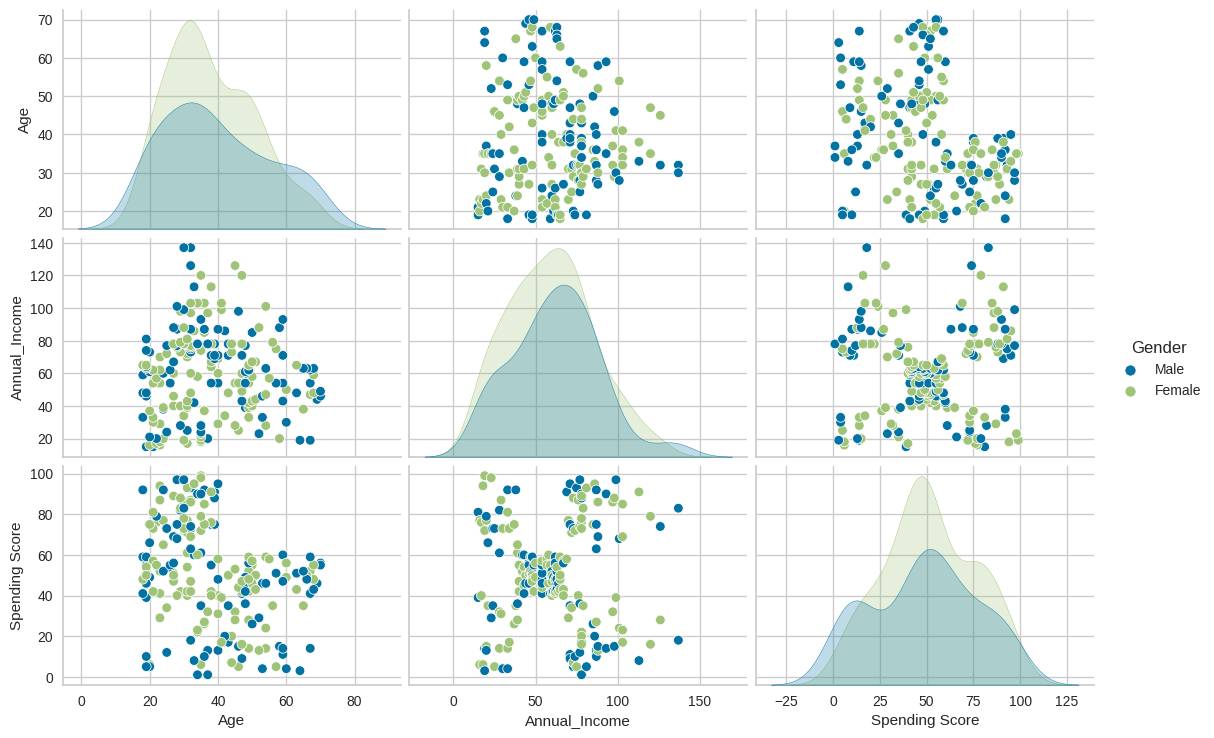

In [198]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5);

In [199]:
df.Annual_Income

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual_Income, Length: 200, dtype: int64

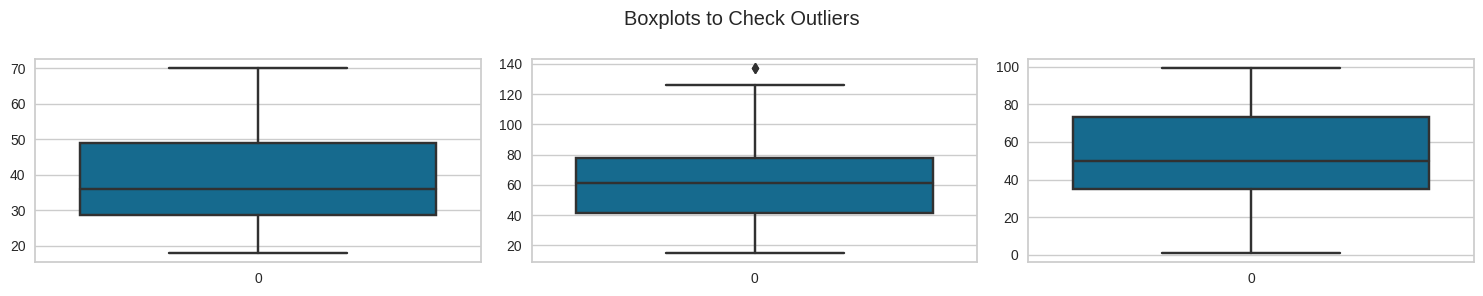

In [200]:
# Outliers check
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cols = ['Age', 'Annual_Income', 'Spending Score']
for i in range(len(cols)):
    sns.boxplot(df[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Check Outliers')
plt.tight_layout()
plt.show()
# there is an outlier in Annual Income feature

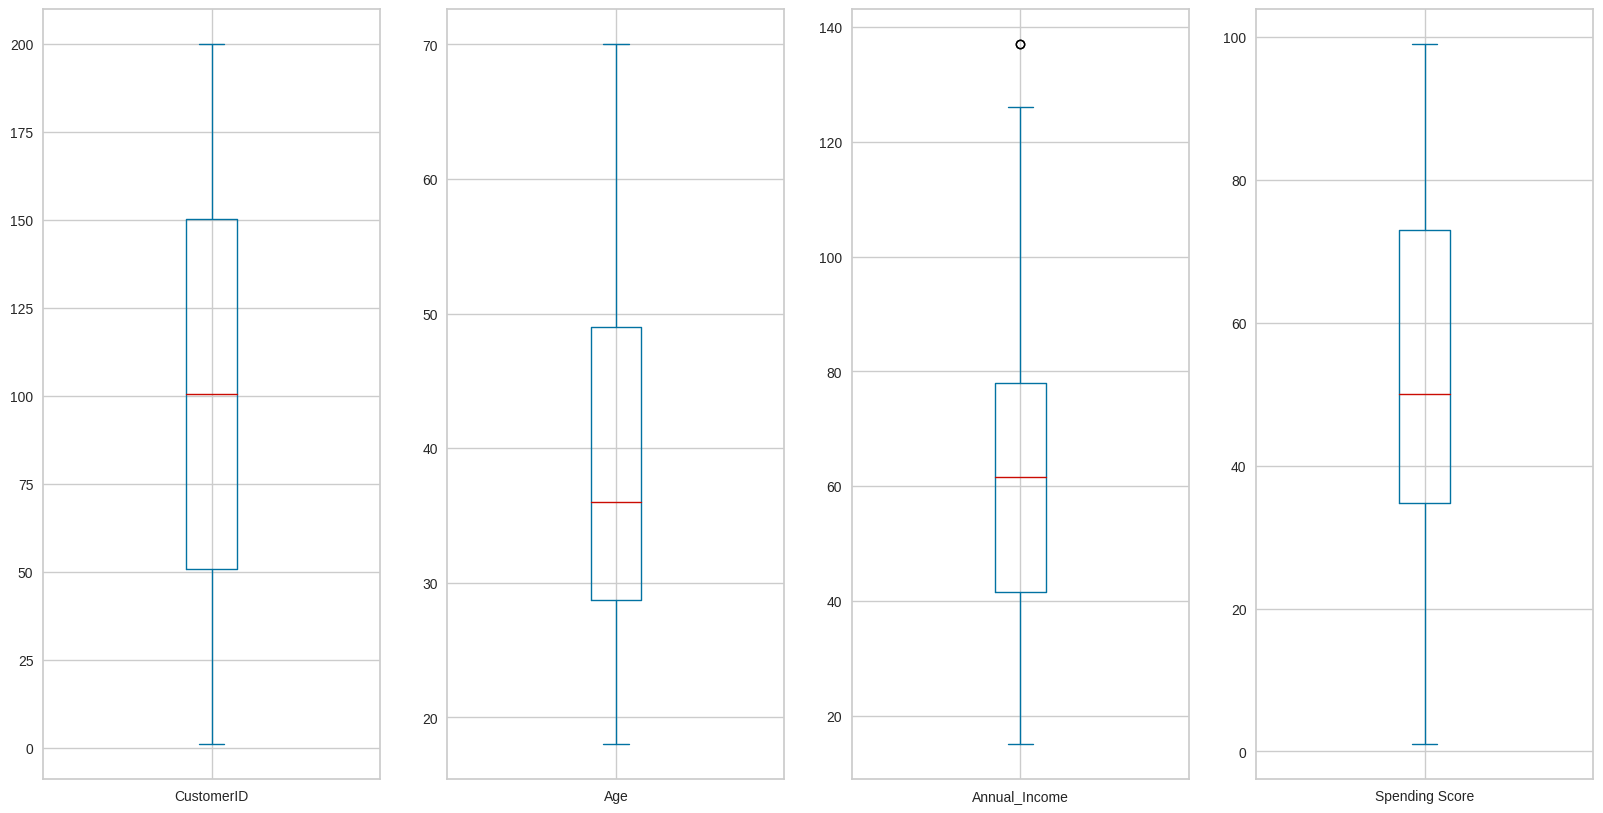

In [201]:
df.plot(kind='box',subplots=True, figsize=(20,10));

In [202]:
df = df[df.Annual_Income < 130]

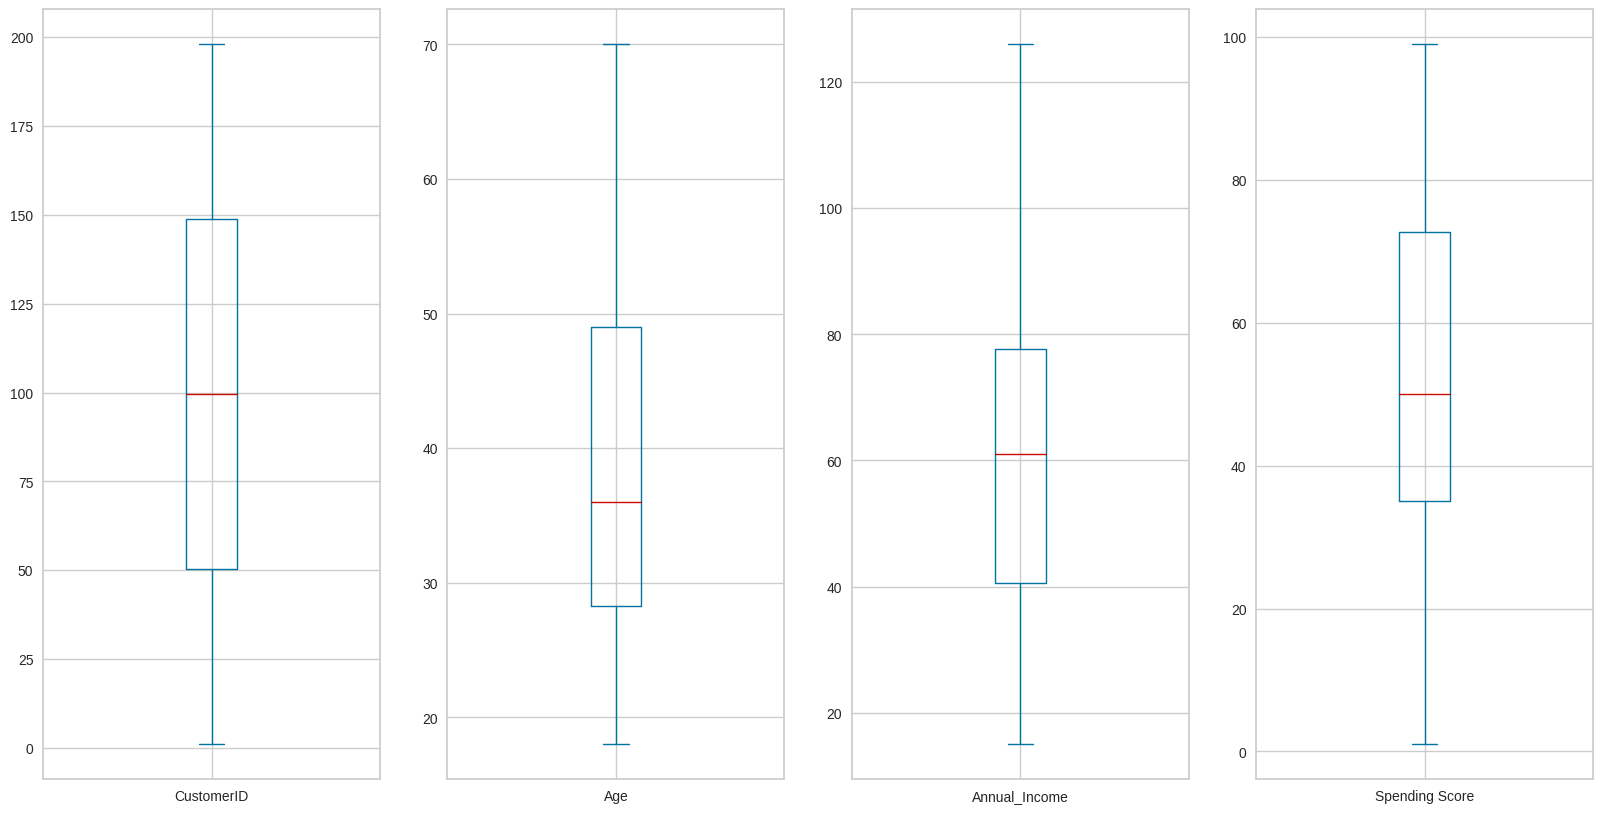

In [203]:
df.plot(kind='box',subplots=True, figsize=(20,10));

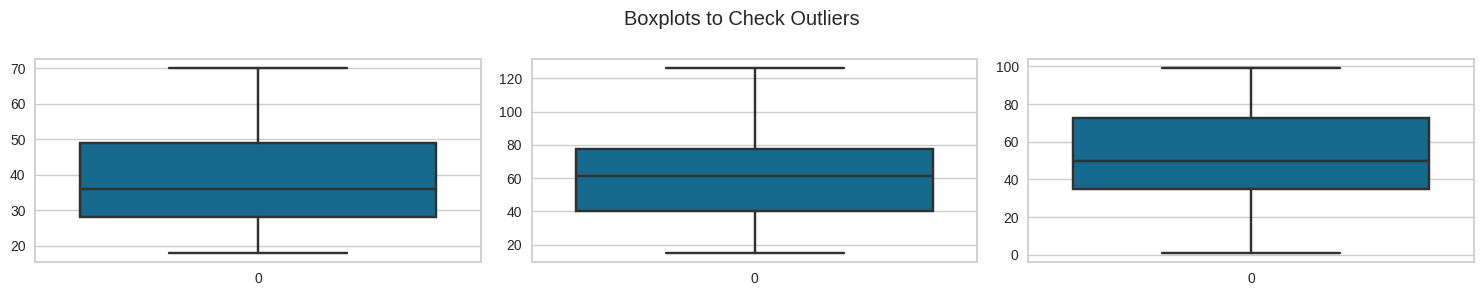

In [204]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cols = ['Age', 'Annual_Income', 'Spending Score']
for i in range(len(cols)):
    sns.boxplot(df[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Check Outliers')
plt.tight_layout()
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [205]:
df2 = df[['Age', 'Spending Score']].copy()

In [206]:
df2.head()

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


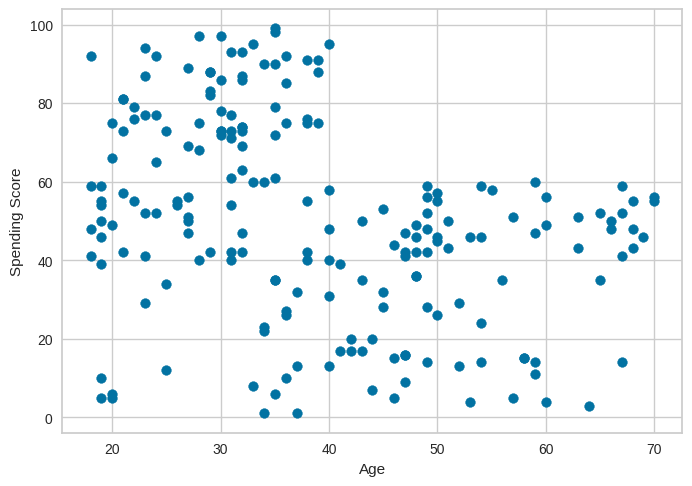

In [207]:
plt.scatter(df2['Age'], df2['Spending Score'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

#### *ii. Determine optimal number of clusters*

## Elbow method

In [208]:
ssd = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(df2)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

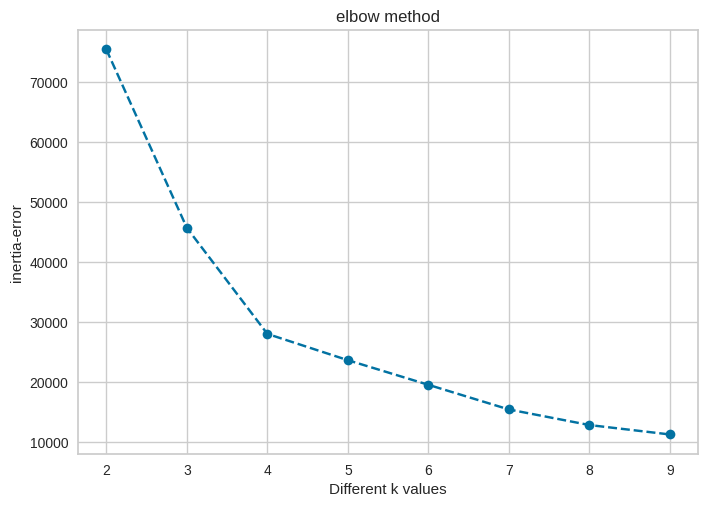

In [209]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [210]:
-pd.Series(ssd).diff()

0             NaN
1    29732.577854
2    17674.680361
3     4385.343196
4     4101.391029
5     4111.404810
6     2594.585257
7     1570.770852
dtype: float64

In [211]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df2)
    distances = kmeanModel.transform(df2)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i]
        result.append(np.mean(cluster_distances ** 2))
    distortion.append(sum(result))

Text(0.5, 1.0, 'elbow method')

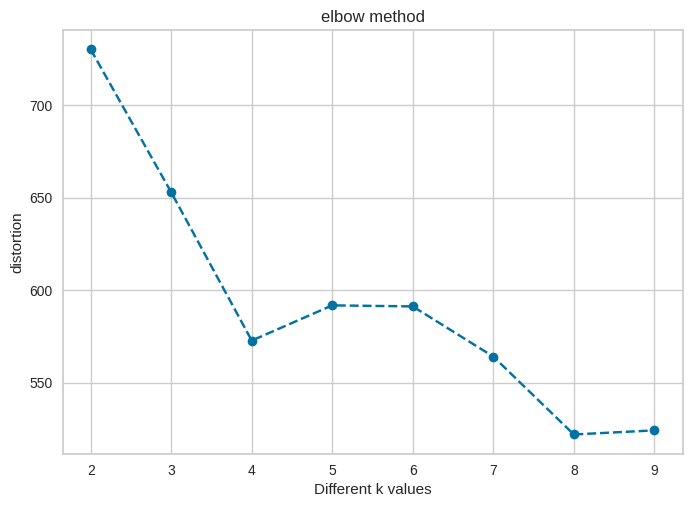

In [212]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

Both elbow tests have k = 4 as the optimal k number for clustering.

### Finding Silhouette Scores for Each Cluster

In [213]:
# calculate the score for each cluster
# Set range of clusters you prefer to test on
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(df2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.46695278354058783
For n_clusters=3, the silhouette score is 0.45167374340791117
For n_clusters=4, the silhouette score is 0.4982143018701353
For n_clusters=5, the silhouette score is 0.44505840166673744
For n_clusters=6, the silhouette score is 0.4463027827653592
For n_clusters=7, the silhouette score is 0.4249442647876566
For n_clusters=8, the silhouette score is 0.43818122127073234
For n_clusters=9, the silhouette score is 0.4207183985372708


In [214]:
K_means_model_ageSpending = KMeans(n_clusters=4, random_state=42)
K_means_model_ageSpending.fit(df2)

KMeans(n_clusters=4, random_state=42)

In [215]:
# calculate the score for all clusters
silhouette_score(df2, K_means_model_ageSpending.labels_)

0.4982143018701353

### Why silhouette_score is negative?

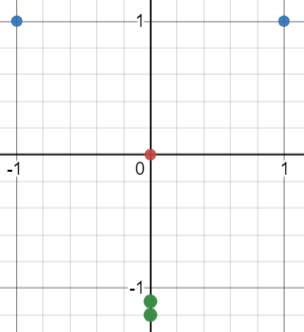

silhouette_score = (b-a)/max(a,b) #The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

b : the mean nearest-cluster distance
a : the mean intra-cluster distance

for red point,

b = 1
a = ((1+1)**0.5 + (1+1)**0.5)/2  

silhouette_score = (1-1.41)/1.41

#### *iii. Apply K Means*

In [216]:
K_means_model_ageSpending = KMeans(n_clusters=4, random_state=42)

In [217]:
K_means_model_ageSpending.fit(df2)

KMeans(n_clusters=4, random_state=42)

In [218]:
K_means_model_ageSpending.labels_

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1],
      dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

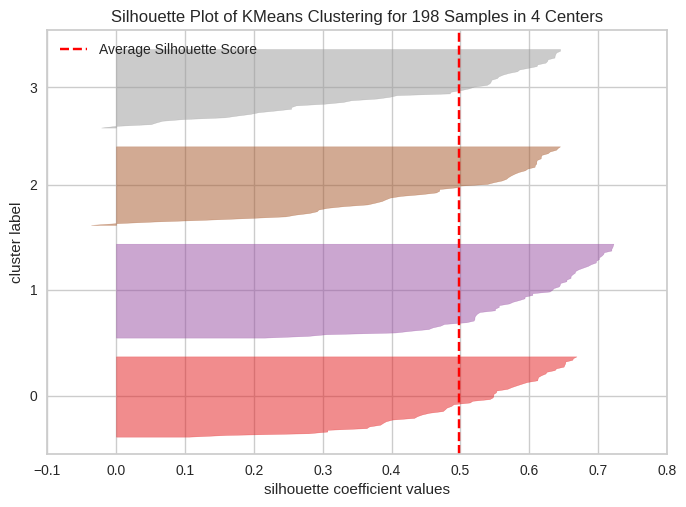

In [219]:

from yellowbrick.cluster import SilhouetteVisualizer


visualizer = SilhouetteVisualizer(K_means_model_ageSpending)

visualizer.fit(df2)
visualizer.poof();

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [220]:
df3 = df[['Annual_Income', 'Spending Score']].copy()

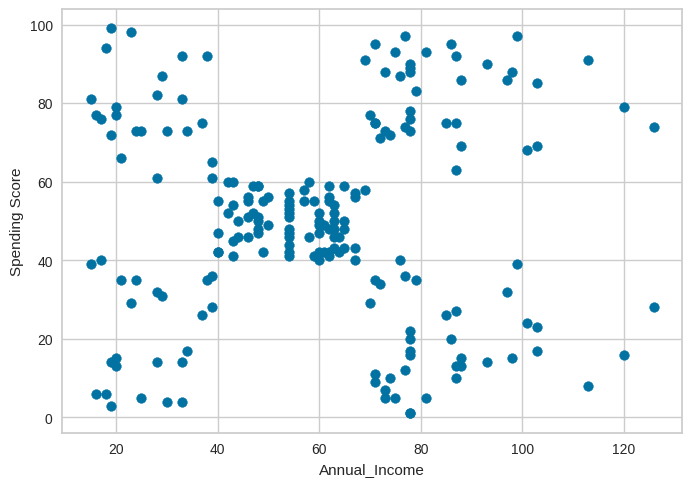

In [221]:
plt.scatter(df3['Annual_Income'], df3['Spending Score'])
plt.xlabel('Annual_Income')
plt.ylabel('Spending Score')
plt.show();

#### *ii. Determine optimal number of clusters*

In [222]:
K_means_model2 = KMeans(n_clusters=5, random_state=42)

#### *iii. Apply K Means*

In [223]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(df3)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

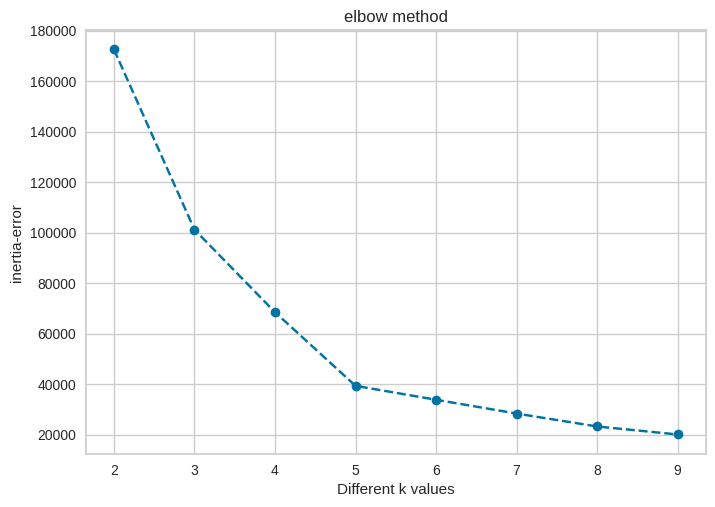

In [224]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [225]:
-pd.Series(ssd).diff()

0             NaN
1    71325.078905
2    32668.584023
3    29152.378177
4     5515.186693
5     5456.738171
6     5114.271838
7     3168.411052
dtype: float64

In [226]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df3)
    distances = kmeanModel.transform(df3)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i]
        result.append(np.mean(cluster_distances ** 2))
    distortion.append(sum(result))

Text(0.5, 1.0, 'elbow method')

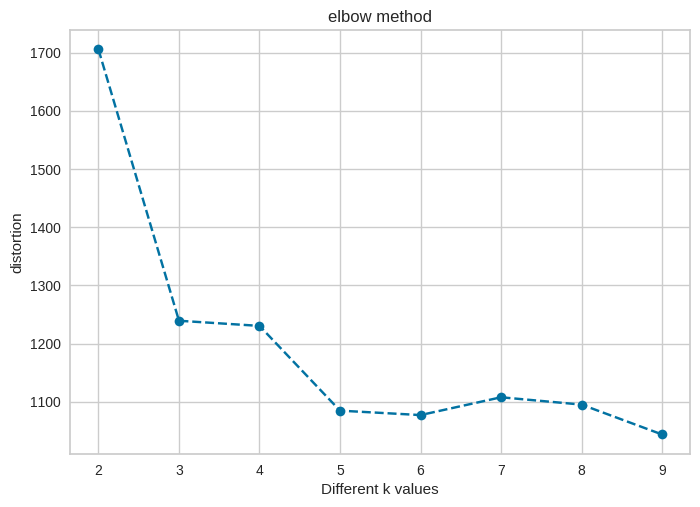

In [227]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

Both elbow tests have k = 5 as the optimal k number for clustering.

In [228]:
# calculate the score for each cluster
# Set range of clusters you prefer to test on
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(df3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.29900633510734437
For n_clusters=3, the silhouette score is 0.46541758070184547
For n_clusters=4, the silhouette score is 0.497441782578338
For n_clusters=5, the silhouette score is 0.5606825090788626
For n_clusters=6, the silhouette score is 0.4650105805464042
For n_clusters=7, the silhouette score is 0.4560439280820137
For n_clusters=8, the silhouette score is 0.45565992348694245
For n_clusters=9, the silhouette score is 0.45454114645963273


In [229]:
K_means_model2.fit(df3)

KMeans(n_clusters=5, random_state=42)

#### *iv. Visualizing and Labeling All the Clusters*

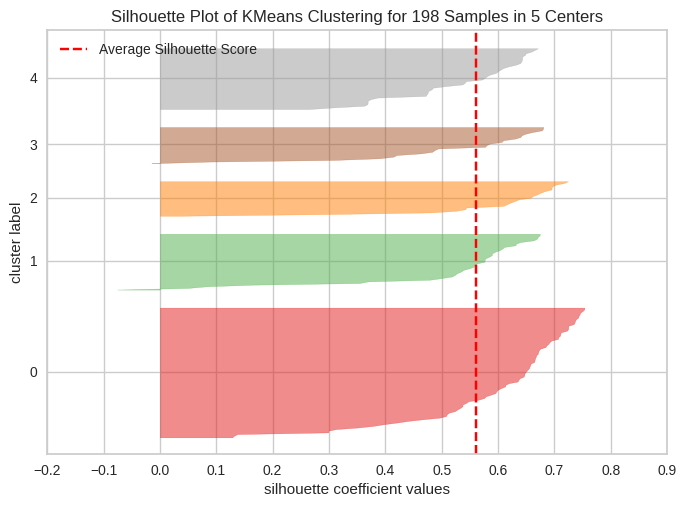

In [230]:
visualizer = SilhouetteVisualizer(K_means_model2)

visualizer.fit(df3)
visualizer.poof();

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [231]:
df2.columns

Index(['Age', 'Spending Score'], dtype='object')

In [232]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2)
scaled

array([[0.01923077, 0.3877551 ],
       [0.05769231, 0.81632653],
       [0.03846154, 0.05102041],
       [0.09615385, 0.7755102 ],
       [0.25      , 0.39795918],
       [0.07692308, 0.76530612],
       [0.32692308, 0.05102041],
       [0.09615385, 0.94897959],
       [0.88461538, 0.02040816],
       [0.23076923, 0.7244898 ],
       [0.94230769, 0.13265306],
       [0.32692308, 1.        ],
       [0.76923077, 0.14285714],
       [0.11538462, 0.7755102 ],
       [0.36538462, 0.12244898],
       [0.07692308, 0.79591837],
       [0.32692308, 0.34693878],
       [0.03846154, 0.66326531],
       [0.65384615, 0.28571429],
       [0.32692308, 0.98979592],
       [0.32692308, 0.34693878],
       [0.13461538, 0.73469388],
       [0.53846154, 0.04081633],
       [0.25      , 0.73469388],
       [0.69230769, 0.13265306],
       [0.21153846, 0.82653061],
       [0.51923077, 0.31632653],
       [0.32692308, 0.6122449 ],
       [0.42307692, 0.30612245],
       [0.09615385, 0.87755102],
       [0.

In [233]:
hc_ward = linkage(df2, method="ward")
hc_complete = linkage(df2, "complete")
hc_average = linkage(df2, "average")
hc_single = linkage(df2, "single")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [152.5, 152.5, 182.5, 182.5],
  [111.25, 111.25, 167.5, 167.5],
  [54.375, 54.375, 139.375, 139.375],
  [20.0, 20.0, 96.875, 96.875]],
 'dcoord': [[0.0, 33.22351874504261, 33.22351874504261, 0.0],
  [0.0, 36.96759442764475, 36.96759442764475, 0.0],
  [33.22351874504261, 85.84921338267254, 85.84921338267254, 36.96759442764475],
  [0.0, 28.74973058216387, 28.74973058216387, 0.0],
  [0.0, 41.13937481944903, 41.13937481944903, 28.74973058216387],
  [0.0, 59.772041076158146, 59.772041076158146, 41.13937481944903],
  [0.0, 85.649902281939

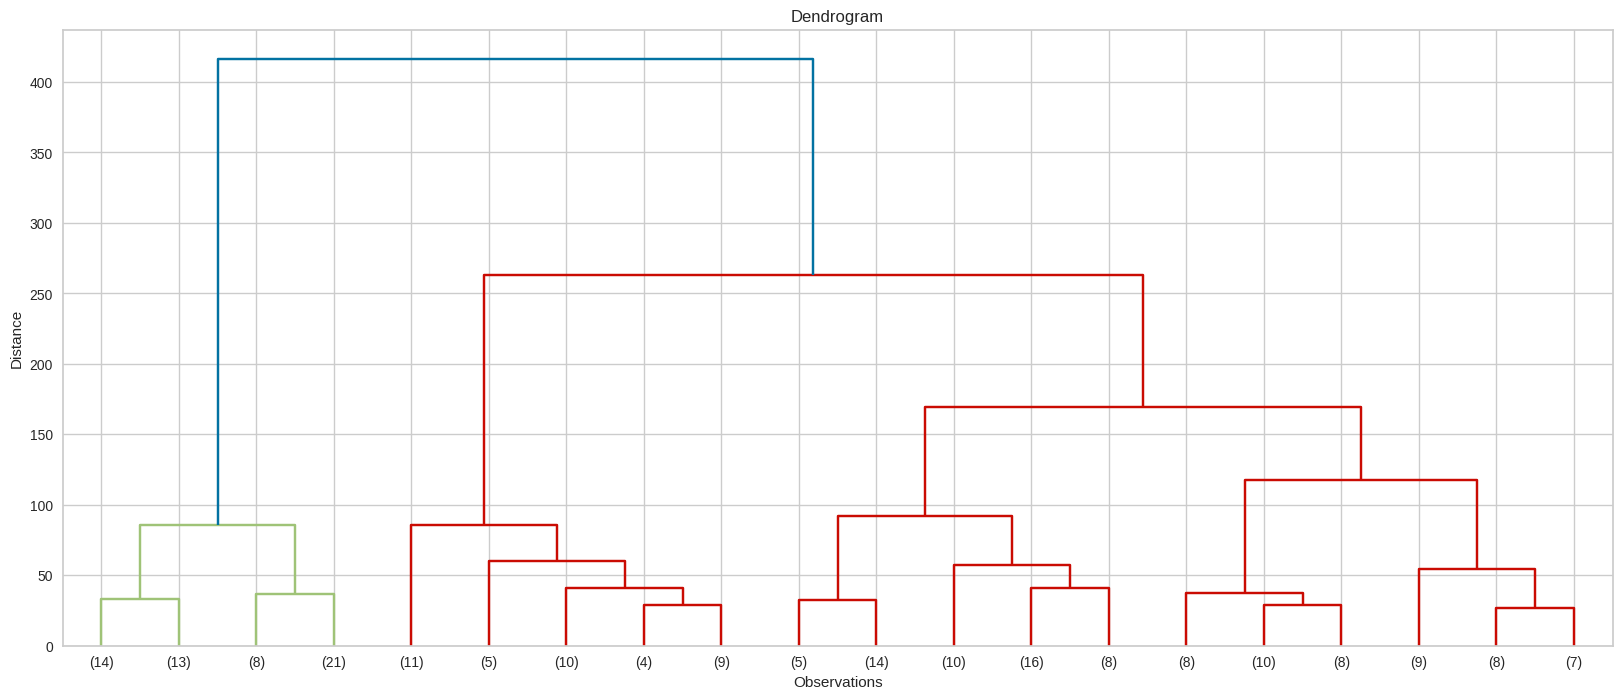

In [234]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=20)

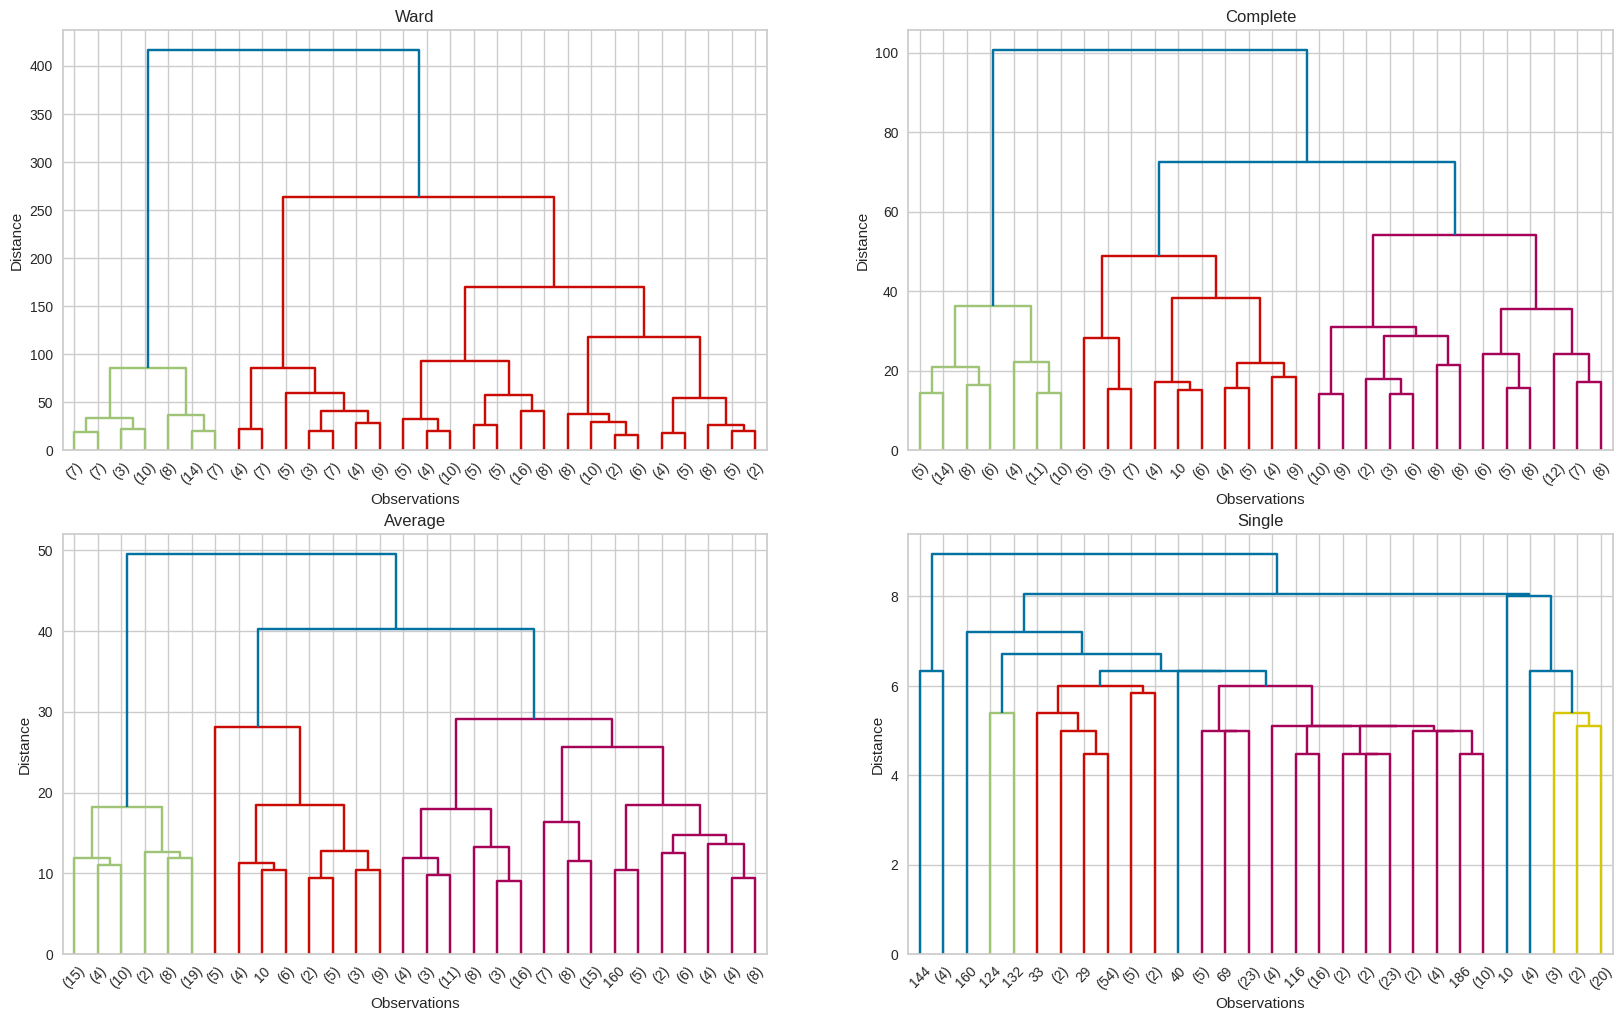

In [235]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp');

## Clustering based on Annual Income and Spending Score- x2

In [236]:
df3.columns

Index(['Annual_Income', 'Spending Score'], dtype='object')

In [237]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df3)
scaled

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00900901, 0.05102041],
       [0.00900901, 0.7755102 ],
       [0.01801802, 0.39795918],
       [0.01801802, 0.76530612],
       [0.02702703, 0.05102041],
       [0.02702703, 0.94897959],
       [0.03603604, 0.02040816],
       [0.03603604, 0.7244898 ],
       [0.03603604, 0.13265306],
       [0.03603604, 1.        ],
       [0.04504505, 0.14285714],
       [0.04504505, 0.7755102 ],
       [0.04504505, 0.12244898],
       [0.04504505, 0.79591837],
       [0.05405405, 0.34693878],
       [0.05405405, 0.66326531],
       [0.07207207, 0.28571429],
       [0.07207207, 0.98979592],
       [0.08108108, 0.34693878],
       [0.08108108, 0.73469388],
       [0.09009009, 0.04081633],
       [0.09009009, 0.73469388],
       [0.11711712, 0.13265306],
       [0.11711712, 0.82653061],
       [0.11711712, 0.31632653],
       [0.11711712, 0.6122449 ],
       [0.12612613, 0.30612245],
       [0.12612613, 0.87755102],
       [0.

In [238]:
hc_ward = linkage(df3, method="ward")
hc_complete = linkage(df3, "complete")
hc_average = linkage(df3, "average")
hc_single = linkage(df3, "single")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [132.5, 132.5, 171.25, 171.25],
  [102.5, 102.5, 151.875, 151.875],
  [70.0, 70.0, 127.1875, 127.1875],
  [21.25, 21.25, 98.59375, 98.59375]],
 'dcoord': [[0.0, 45.00833256187124, 45.00833256187124, 0.0],
  [0.0, 49.88403218131697, 49.88403218131697, 0.0],
  [0.0, 69.52315475882152, 69.52315475882152, 49.88403218131697],
  [45.00833256187124, 95.98492663096054, 95.98492663096054, 69.52315475882152],
  [0.0, 41.39665848028478, 41.39665848028478, 0.0],
  [0.0, 49.48842500827705, 49.48842500827705, 0.0],
  [41.39665848028478, 99.26712689

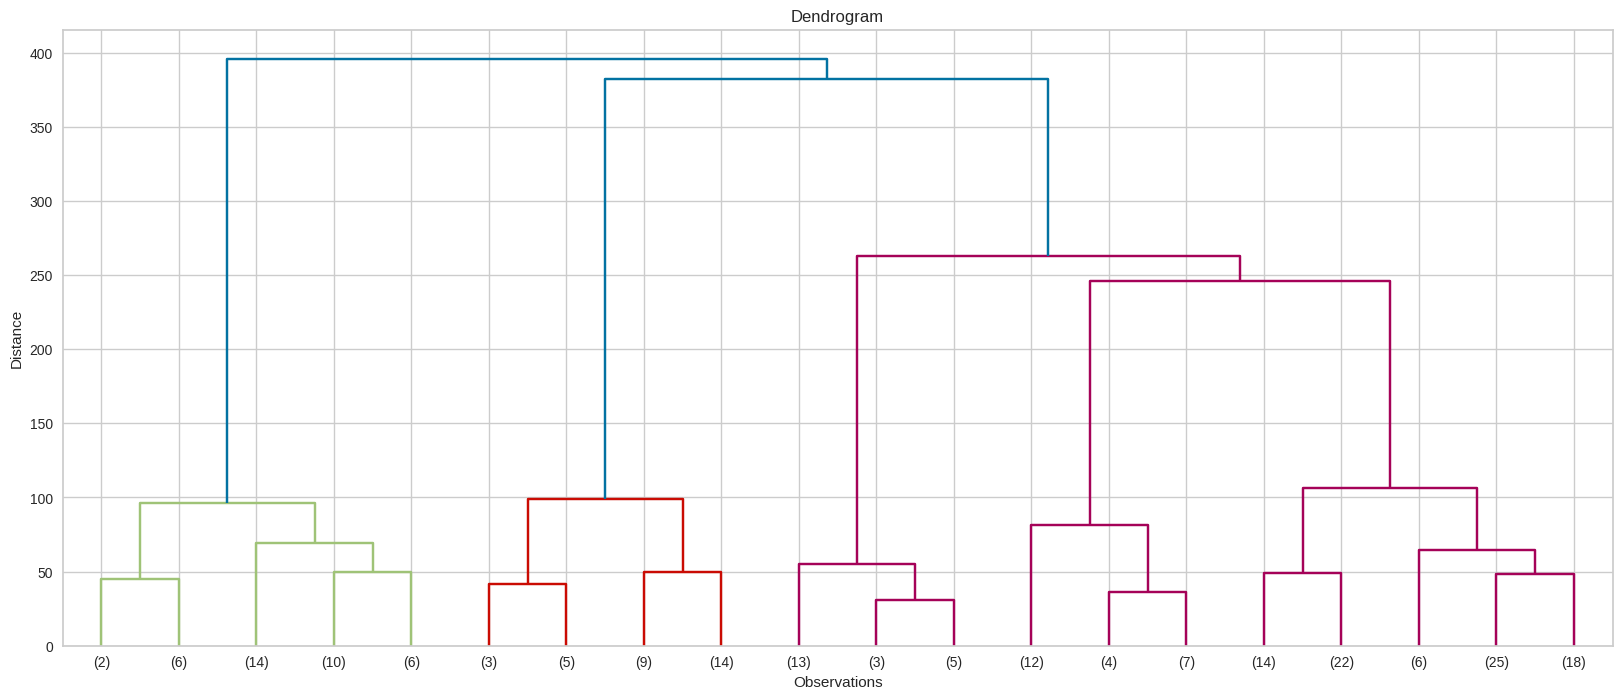

In [239]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=20)

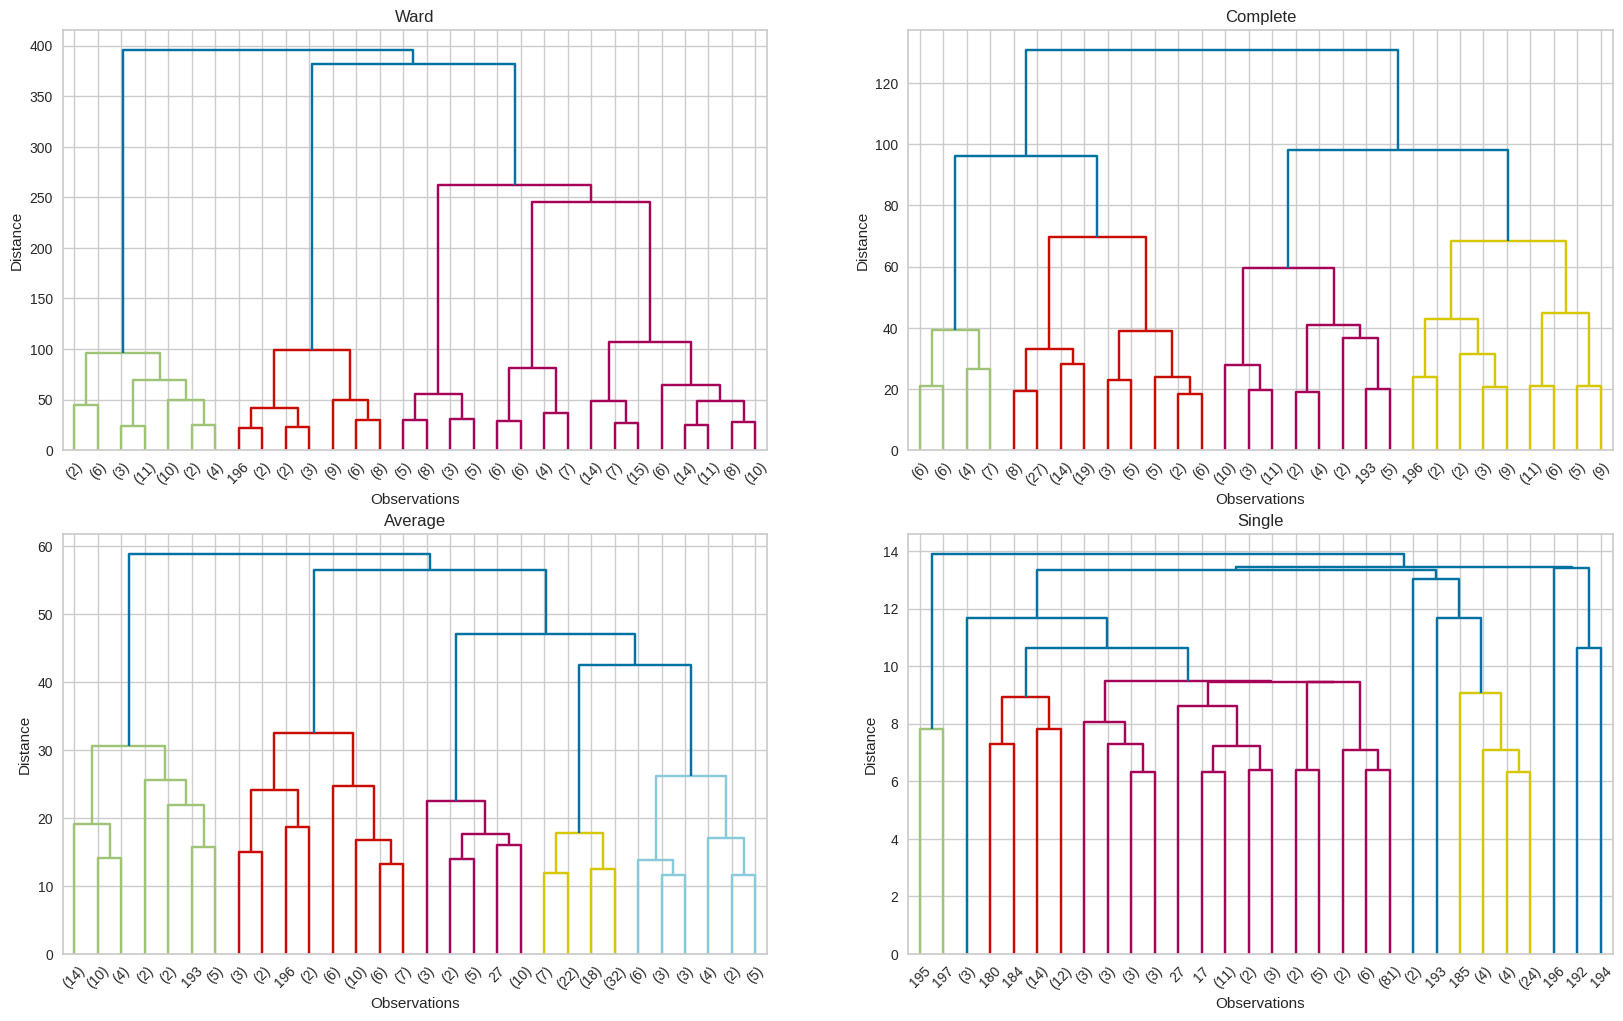

In [240]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp');

### ii. *Apply Agglomerative Clustering*

In [241]:
from sklearn.cluster import AgglomerativeClustering

#### Age and Spending Score- x1

In [242]:
model = AgglomerativeClustering(n_clusters=2,
                                metric="euclidean", # NOTE: uncomment this line
                                linkage="ward")

In [243]:
model.fit(df2)

AgglomerativeClustering(metric='euclidean')

In [244]:
model.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [245]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(scaled, model.labels_)}')


Silhouette Score for 2 clusters: 0.3878151257866469
Silhouette Score for 3 clusters: 0.4508320812245594
Silhouette Score for 4 clusters: 0.4976625329394393
Silhouette Score for 5 clusters: 0.5616014780954574
Silhouette Score for 6 clusters: 0.44499269231842564
Silhouette Score for 7 clusters: 0.43526936859586857
Silhouette Score for 8 clusters: 0.41434190341209703
Silhouette Score for 9 clusters: 0.4245377157128768


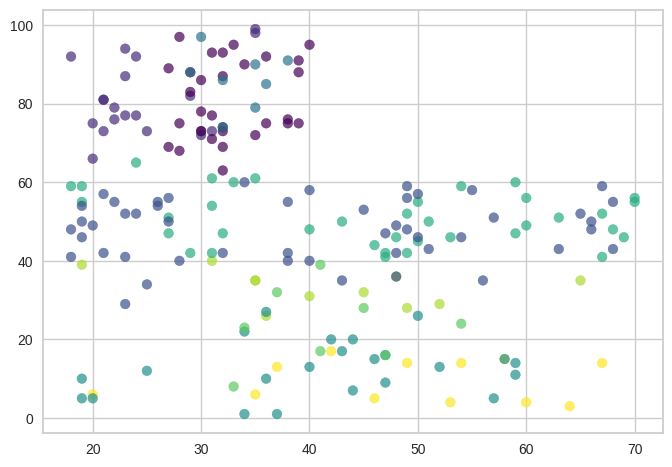

In [246]:
plt.scatter(df2["Age"],
            df2["Spending Score"],
            c=model.labels_,
            cmap="viridis",
            alpha=0.7)

#### Annual Income and Spending Score- x2

In [247]:
model2 = AgglomerativeClustering(n_clusters=2,
                                 metric="euclidean", # NOTE: uncomment this line
                                 linkage="ward")
model2.fit_predict(df3)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [248]:
model2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

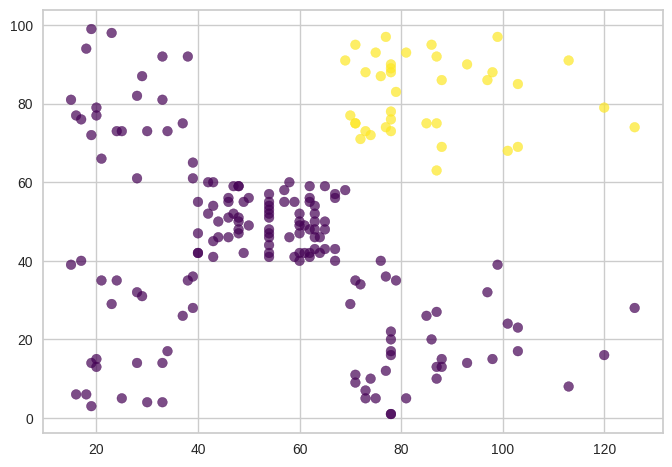

In [249]:
plt.scatter(df3["Annual_Income"],
            df3["Spending Score"],
            c=model2.labels_,
            cmap="viridis",
            alpha=0.7)

### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

In [250]:
centers = K_means_model_ageSpending.cluster_centers_
centers

array([[55.70833333, 48.22916667],
       [30.17857143, 82.33928571],
       [43.53191489, 14.95744681],
       [27.61702128, 49.14893617]])

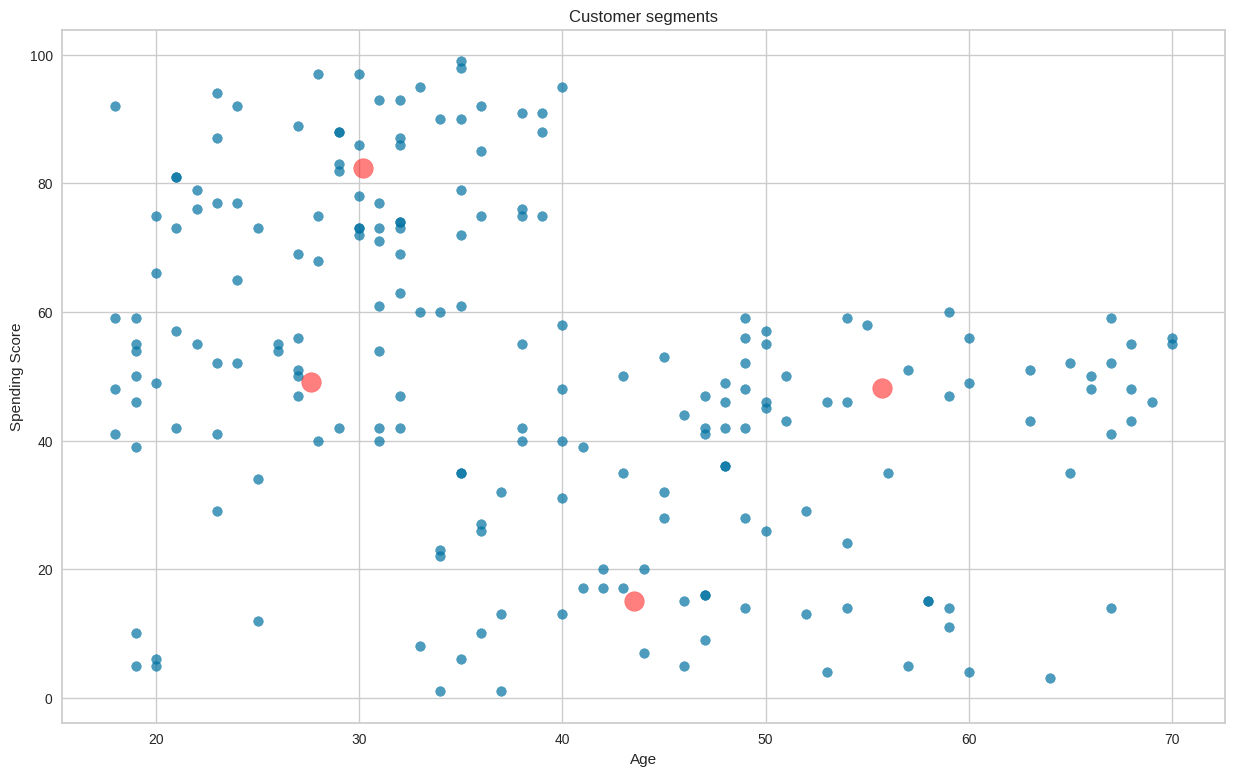

In [251]:
plt.figure(figsize=(15, 9))
plt.scatter(df2["Age"], df2["Spending Score"], cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Customer segments')
plt.xlabel('Age')
plt.ylabel('Spending Score');

#### Annual Income and Spending Score- x2

In [252]:
centers = K_means_model2.cluster_centers_
centers

array([[55.0875    , 49.7125    ],
       [86.34285714, 17.57142857],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [85.21052632, 82.10526316]])

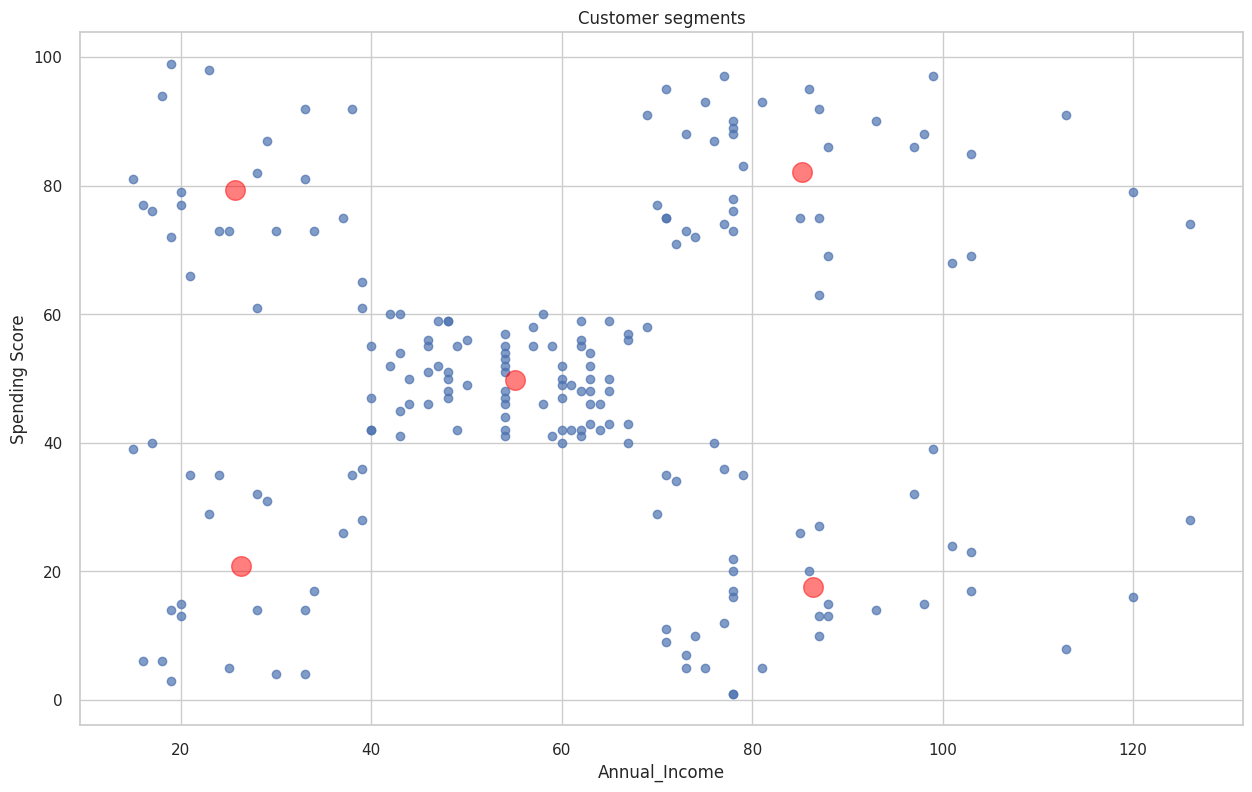

In [288]:
plt.figure(figsize=(15, 9))
plt.scatter(df3["Annual_Income"], df3["Spending Score"], cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Customer segments')
plt.xlabel('Annual_Income')
plt.ylabel('Spending Score');

#### Interpretation based on Age and Spending Score- x1

In [254]:
df2

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
193,38,91
194,47,16
195,35,79
196,45,28


In [255]:
df2.value_counts()

Age  Spending Score
47   16                2
29   88                2
32   74                2
30   73                2
21   81                2
                      ..
32   47                1
     63                1
     69                1
     73                1
70   56                1
Length: 190, dtype: int64

In [281]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,198.0,38.929293,14.016852,18.0,28.25,36.0,49.00,70.0
Spending Score,198.0,50.196970,25.746846,1.0,35.00,50.0,72.75,99.0


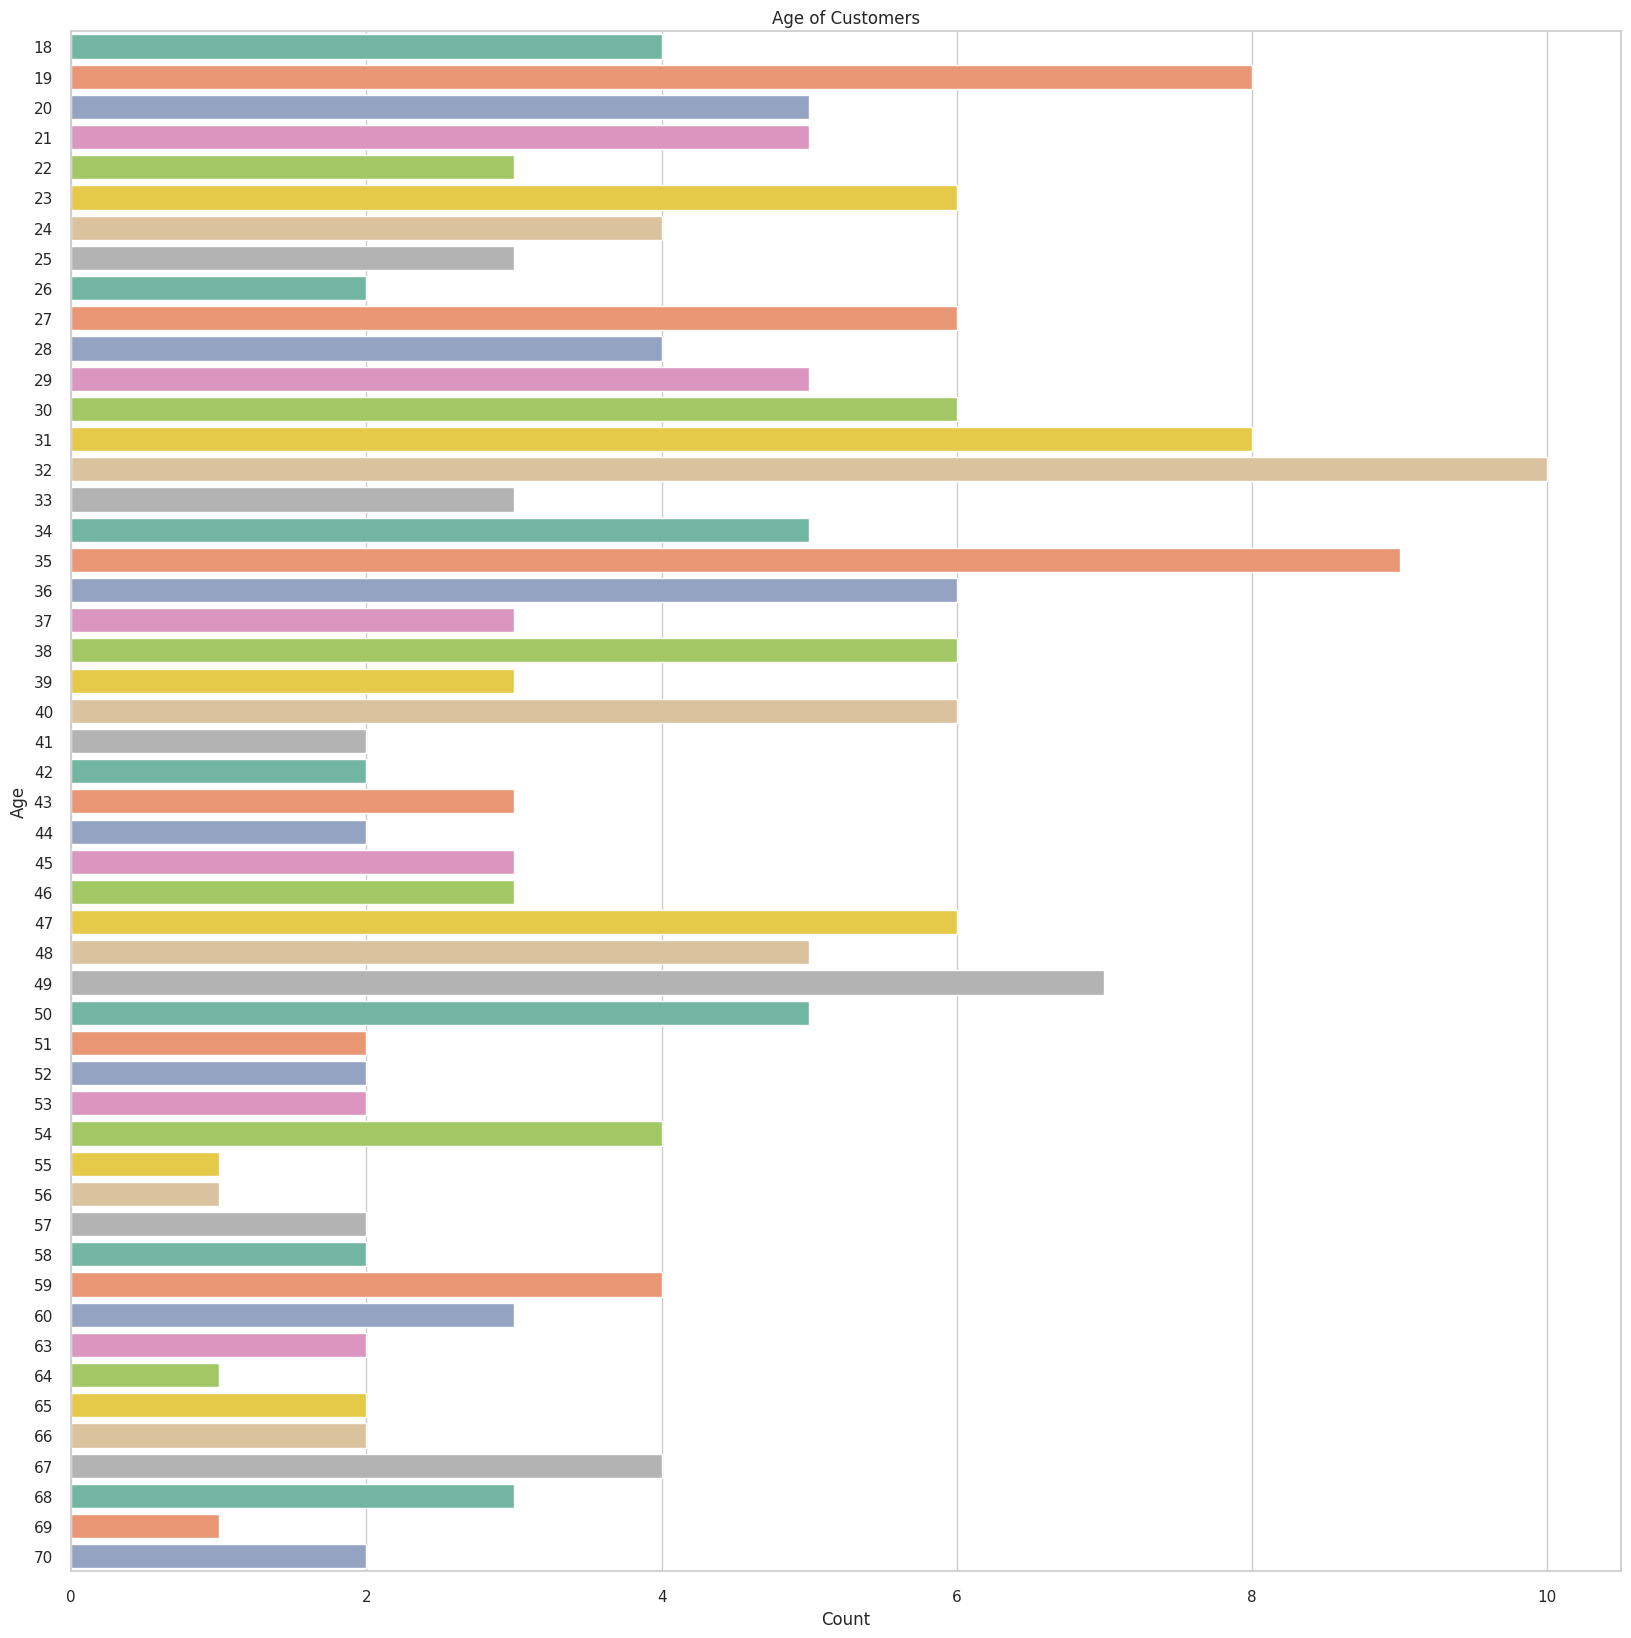

In [320]:
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")
sns.countplot(data= df2, y="Age", palette="Set2")

plt.title("Age of Customers")
plt.xlabel("Count")
plt.ylabel("Age")

plt.show()

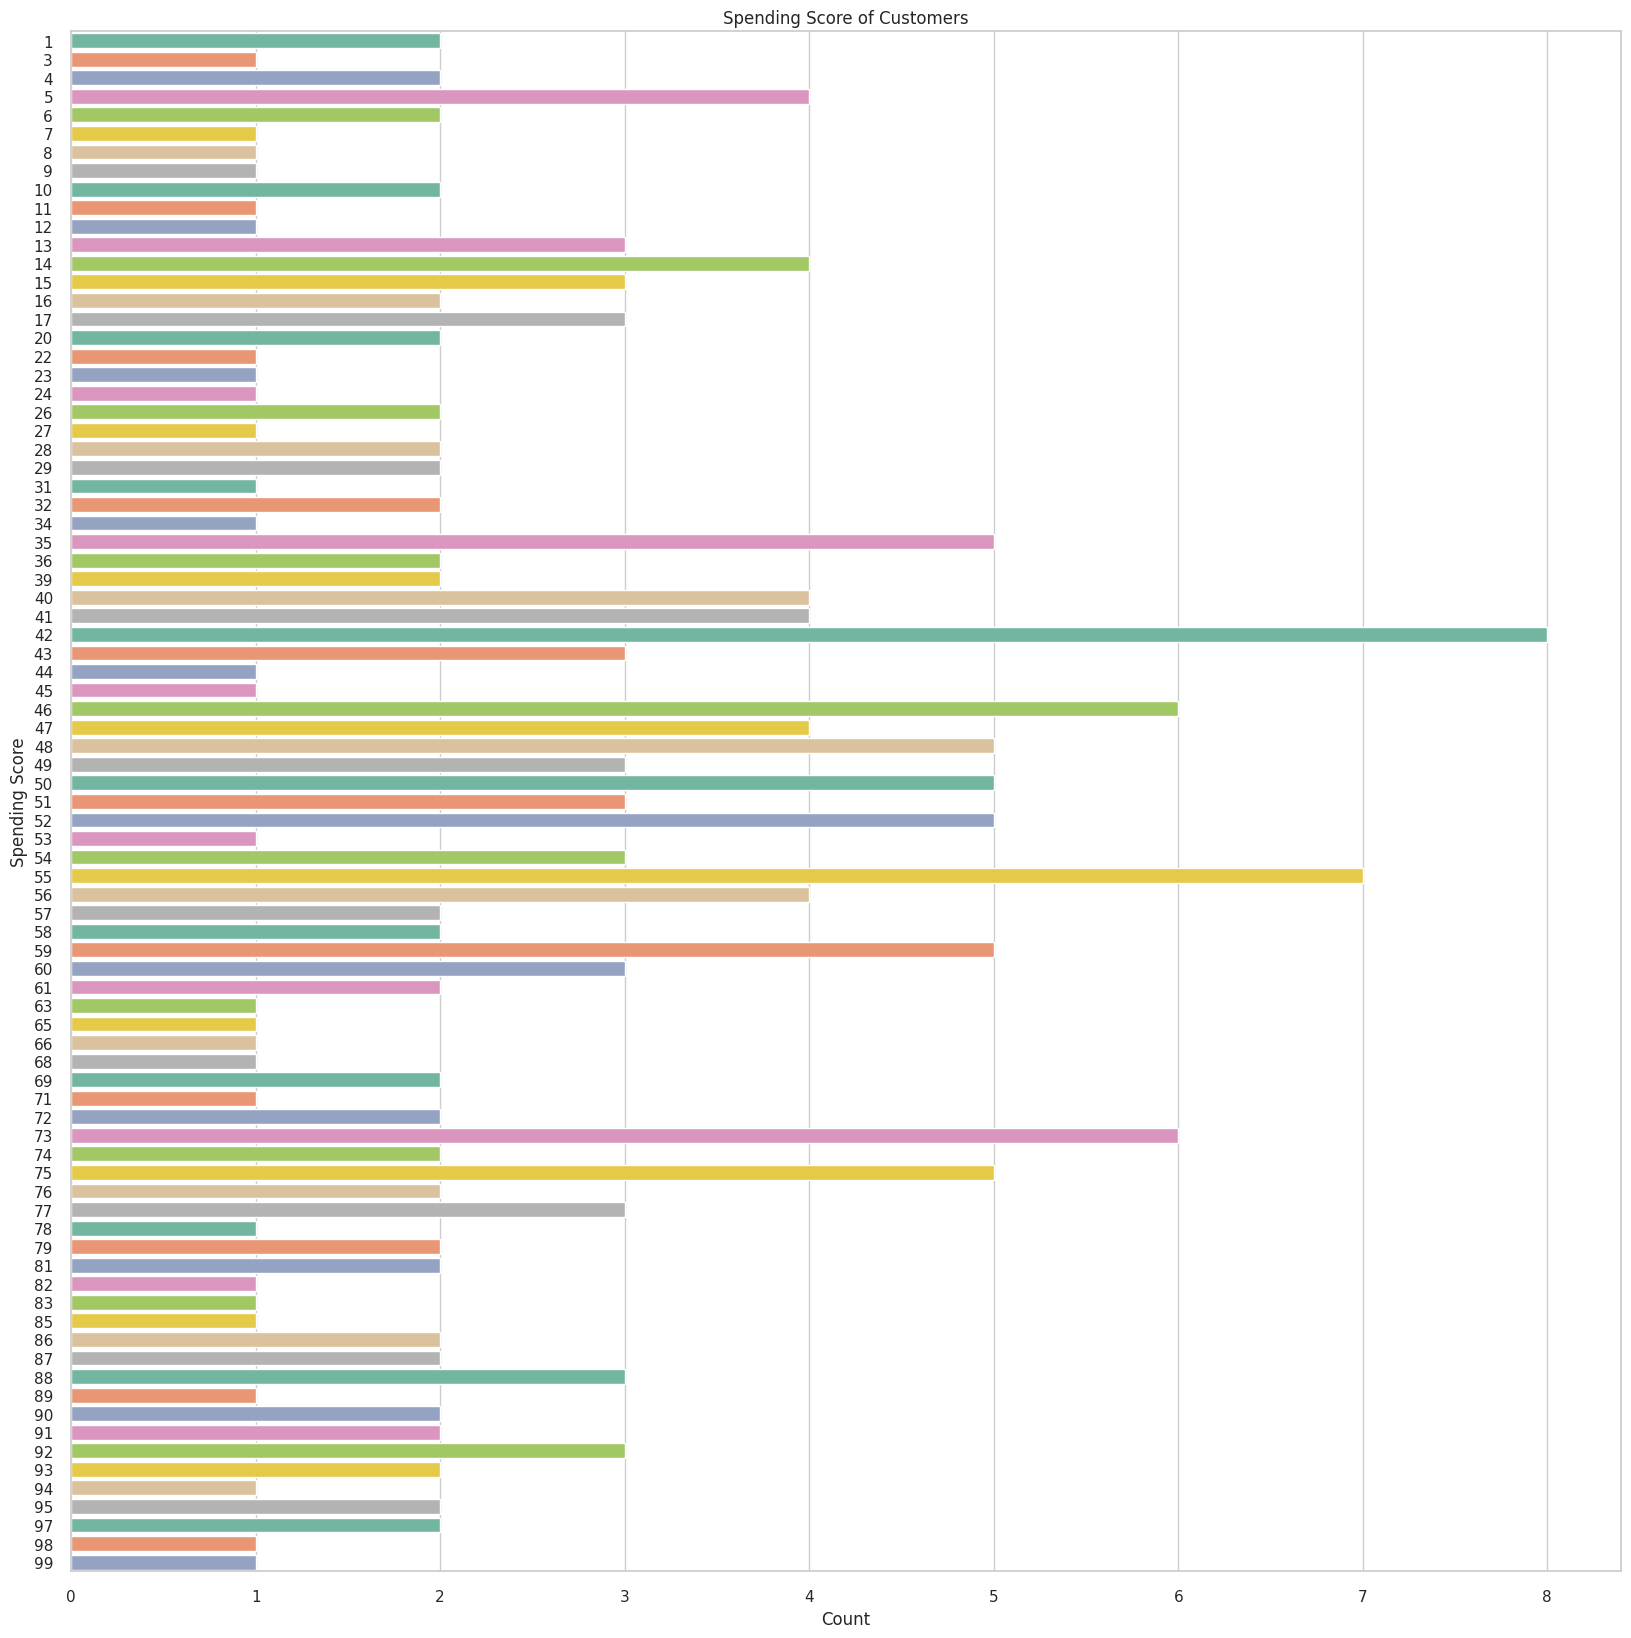

In [321]:
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")
sns.countplot(data= df2, y="Spending Score", palette="Set2")

plt.title("Spending Score of Customers")
plt.xlabel("Count")
plt.ylabel("Spending Score")

plt.show()

In [334]:
df2["cluster"] = kmeans.fit_predict(df2)
df2

,Age,Spending Score,cluster
0,19,39,4
1,21,81,8
2,20,6,5
3,23,77,8
4,31,40,4
...,...,...,...
193,38,91,3
194,47,16,6
195,35,79,8
196,45,28,1


In [326]:
clu_mean = df2.groupby("cluster").mean()
clu_mean

,Age,Spending Score
cluster,,
0,64.850000,49.850000
1,41.904762,32.238095
2,25.318182,56.772727
3,31.520000,91.320000
4,50.920000,12.880000
5,24.750000,41.812500
6,48.148148,49.518519
7,29.096774,75.096774
8,28.636364,7.000000


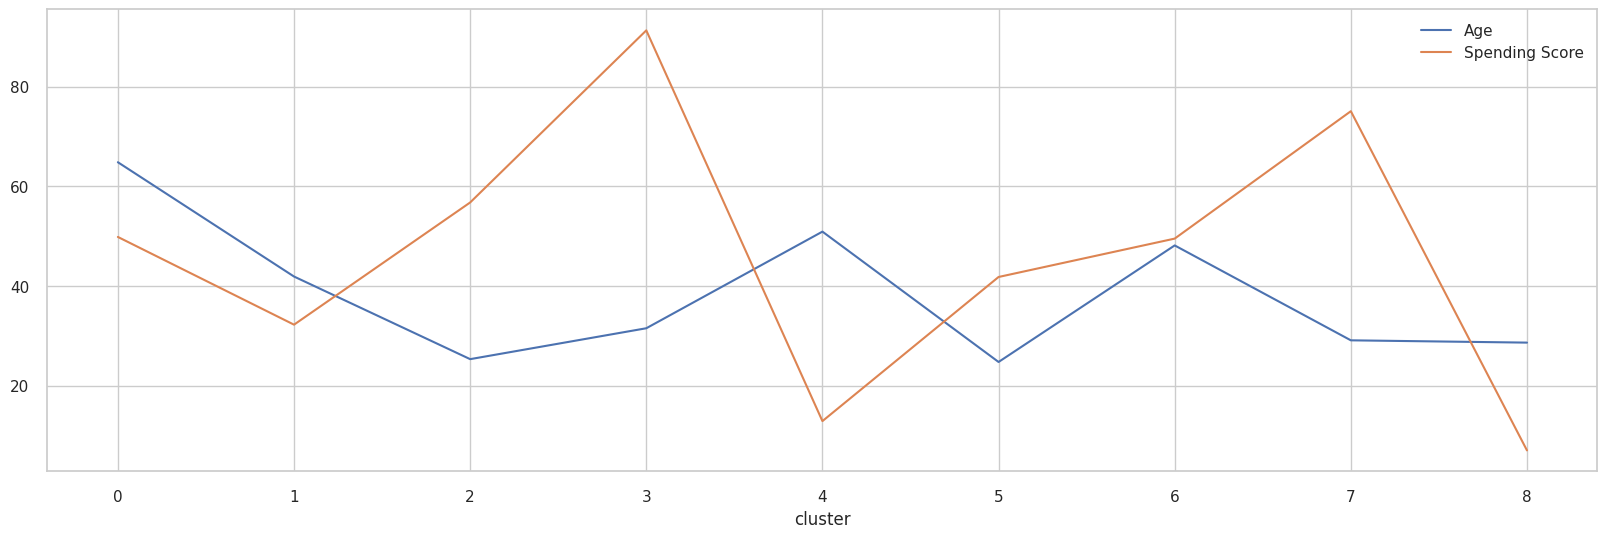

In [324]:
ax = clu_mean.plot(kind='line', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f");

<Axes: xlabel='cluster', ylabel='Age'>

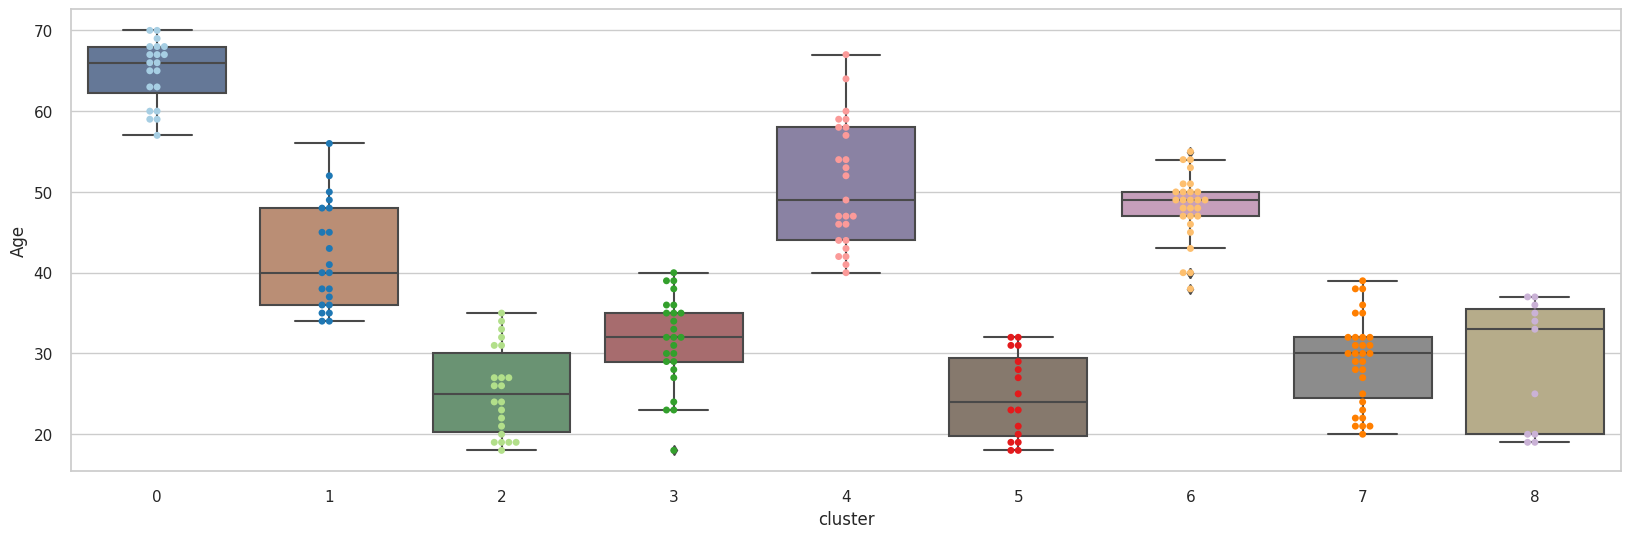

In [314]:
plt.figure(figsize = (20,6))
sns.boxplot(y="Age", x="cluster", data = df2,palette="deep",saturation=0.5)
sns.swarmplot(y = "Age", x = "cluster", data = df2,palette=sns.color_palette("Paired"))

<Axes: xlabel='cluster', ylabel='Spending Score'>

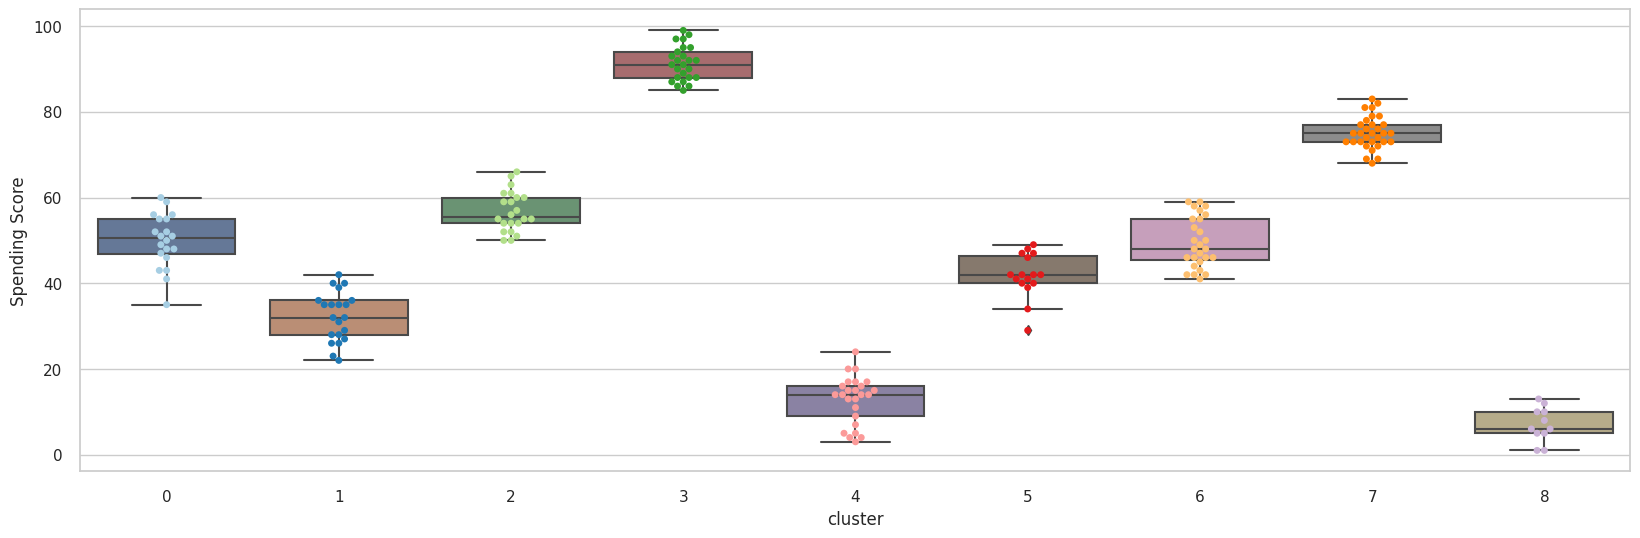

In [317]:
plt.figure(figsize = (20,6))
sns.boxplot(y="Spending Score", x="cluster", data = df2,palette="deep",saturation=0.5)
sns.swarmplot(y = "Spending Score", x = "cluster", data = df2,palette=sns.color_palette("Paired"))

### Conclusion

**cluster 0** : The average age is around 64, where the avarge Spending Score is around 50.

**cluster 1**: The average age is around 41, where the avarge Spending Score is around 32.

**cluster 2** :The average age is around 25, where the avarge Spending Score is around 56.    
    
**cluster 3**: The average age is around 31, where the avarge Spending Score is around 91.

**cluster 4**: The average age is around 50, where the avarge Spending Score is around 12.

**cluster 5**: The average age is around 24, where the avarge Spending Score is around 41.

**cluster 6**: The average age is around 48, where the avarge Spending Score is around 49.

**cluster 7**: The average age is around 29, where the avarge Spending Score is around 75.

**cluster 8**: The average age is around 28, where the avarge Spending Score is around 7.

#### Interpretation based on Annual Income and Spending Score- x2

In [327]:
df3

,Annual_Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
193,113,91
194,120,16
195,120,79
196,126,28


In [328]:
df3.value_counts()

Annual_Income  Spending Score
78             1                 2
40             42                2
71             75                2
48             59                2
73             73                1
                                ..
49             42                1
               55                1
50             49                1
               56                1
126            74                1
Length: 194, dtype: int64

In [329]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual_Income,198.0,59.787879,25.237259,15.0,40.5,61.0,77.75,126.0
Spending Score,198.0,50.196970,25.746846,1.0,35.0,50.0,72.75,99.0


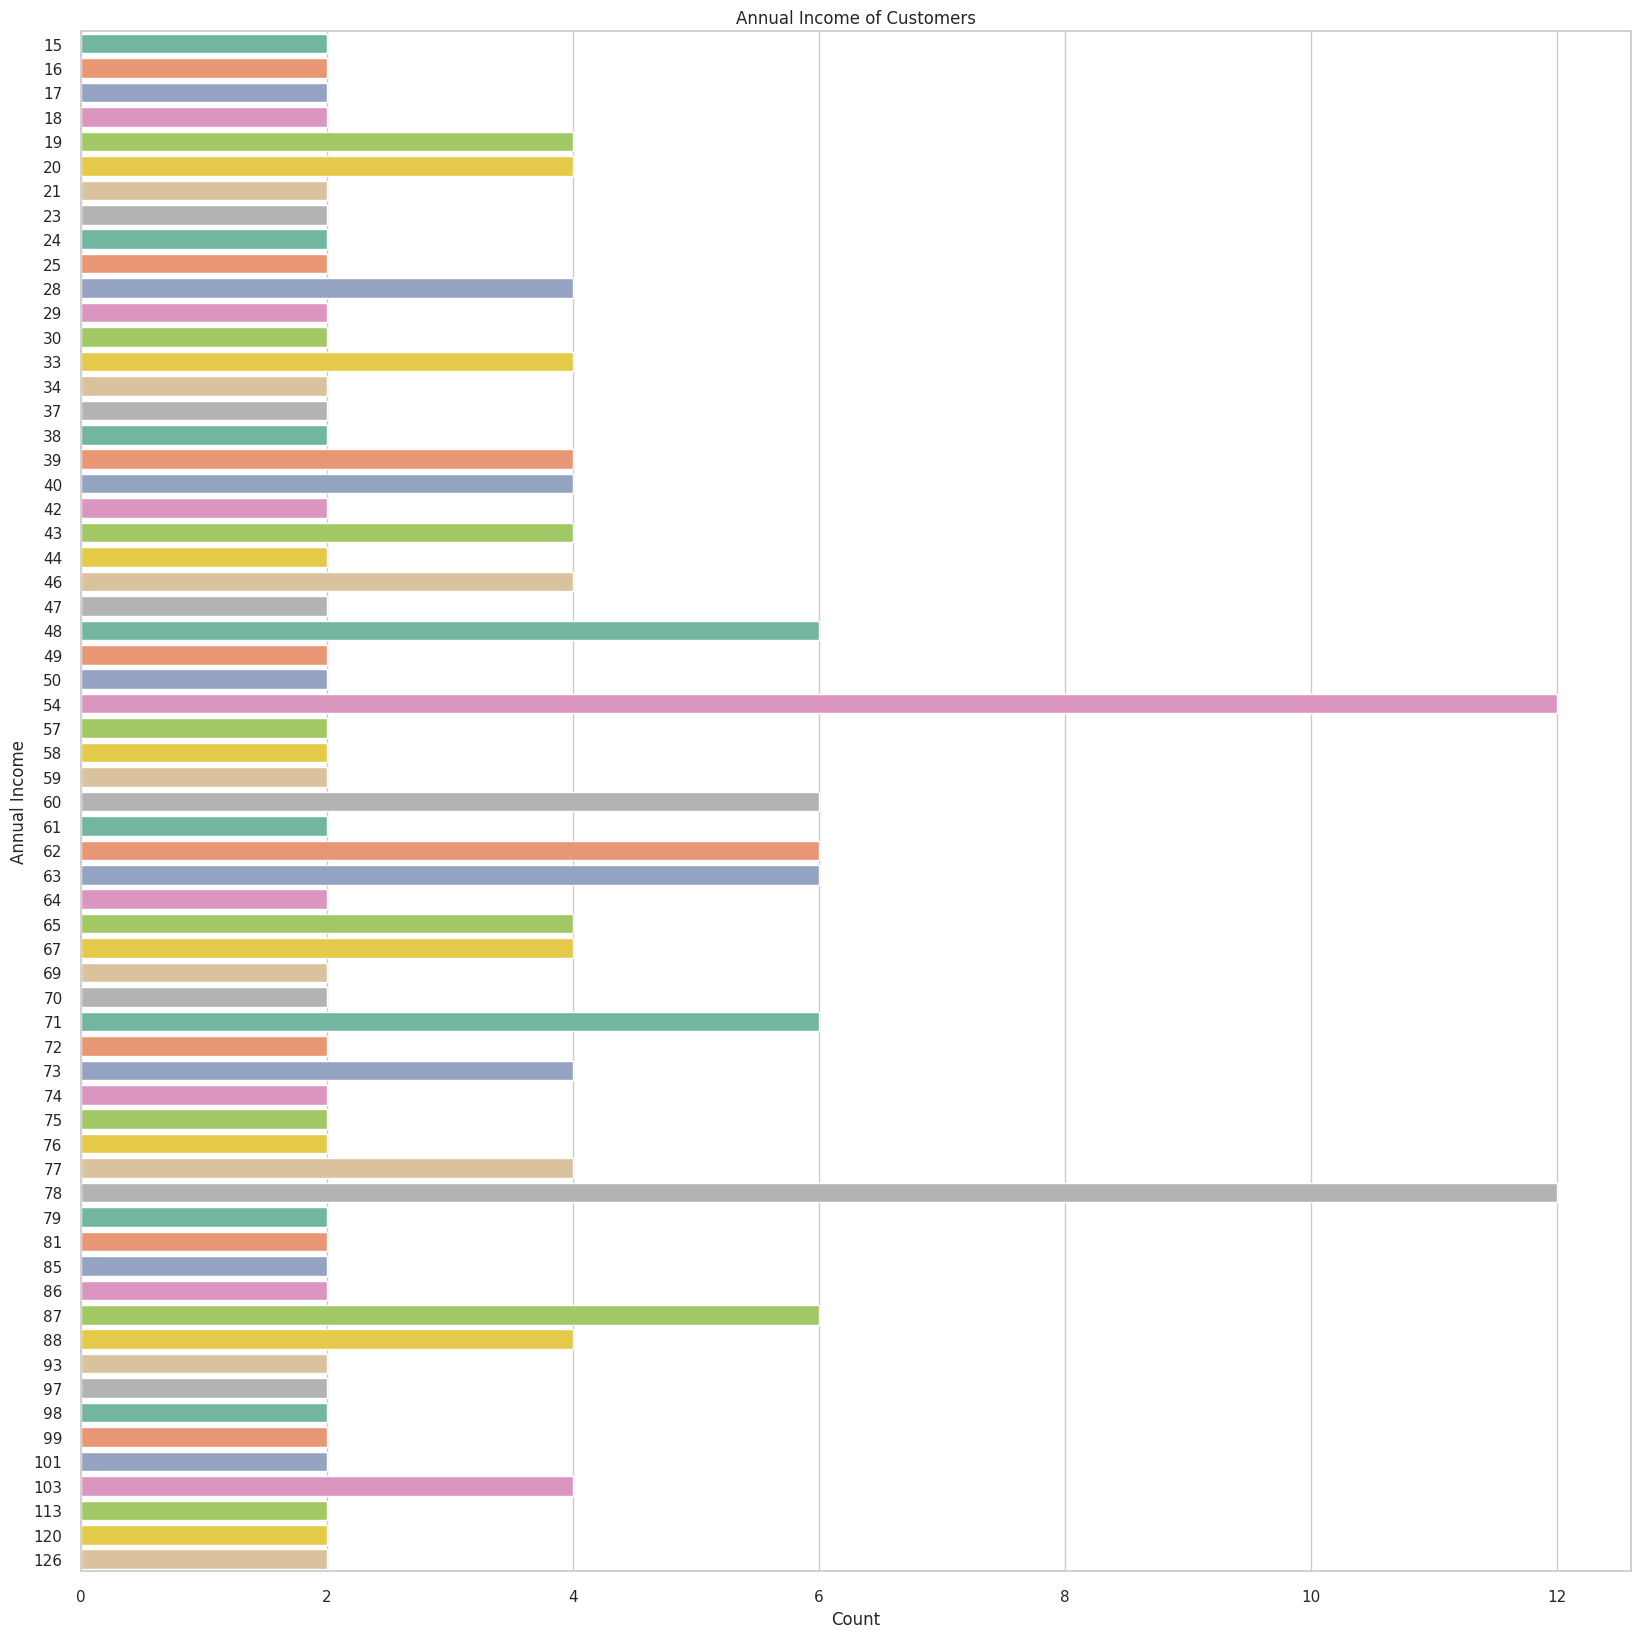

In [330]:
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")
sns.countplot(data= df3, y="Annual_Income", palette="Set2")

plt.title("Annual Income of Customers")
plt.xlabel("Count")
plt.ylabel("Annual Income")

plt.show()

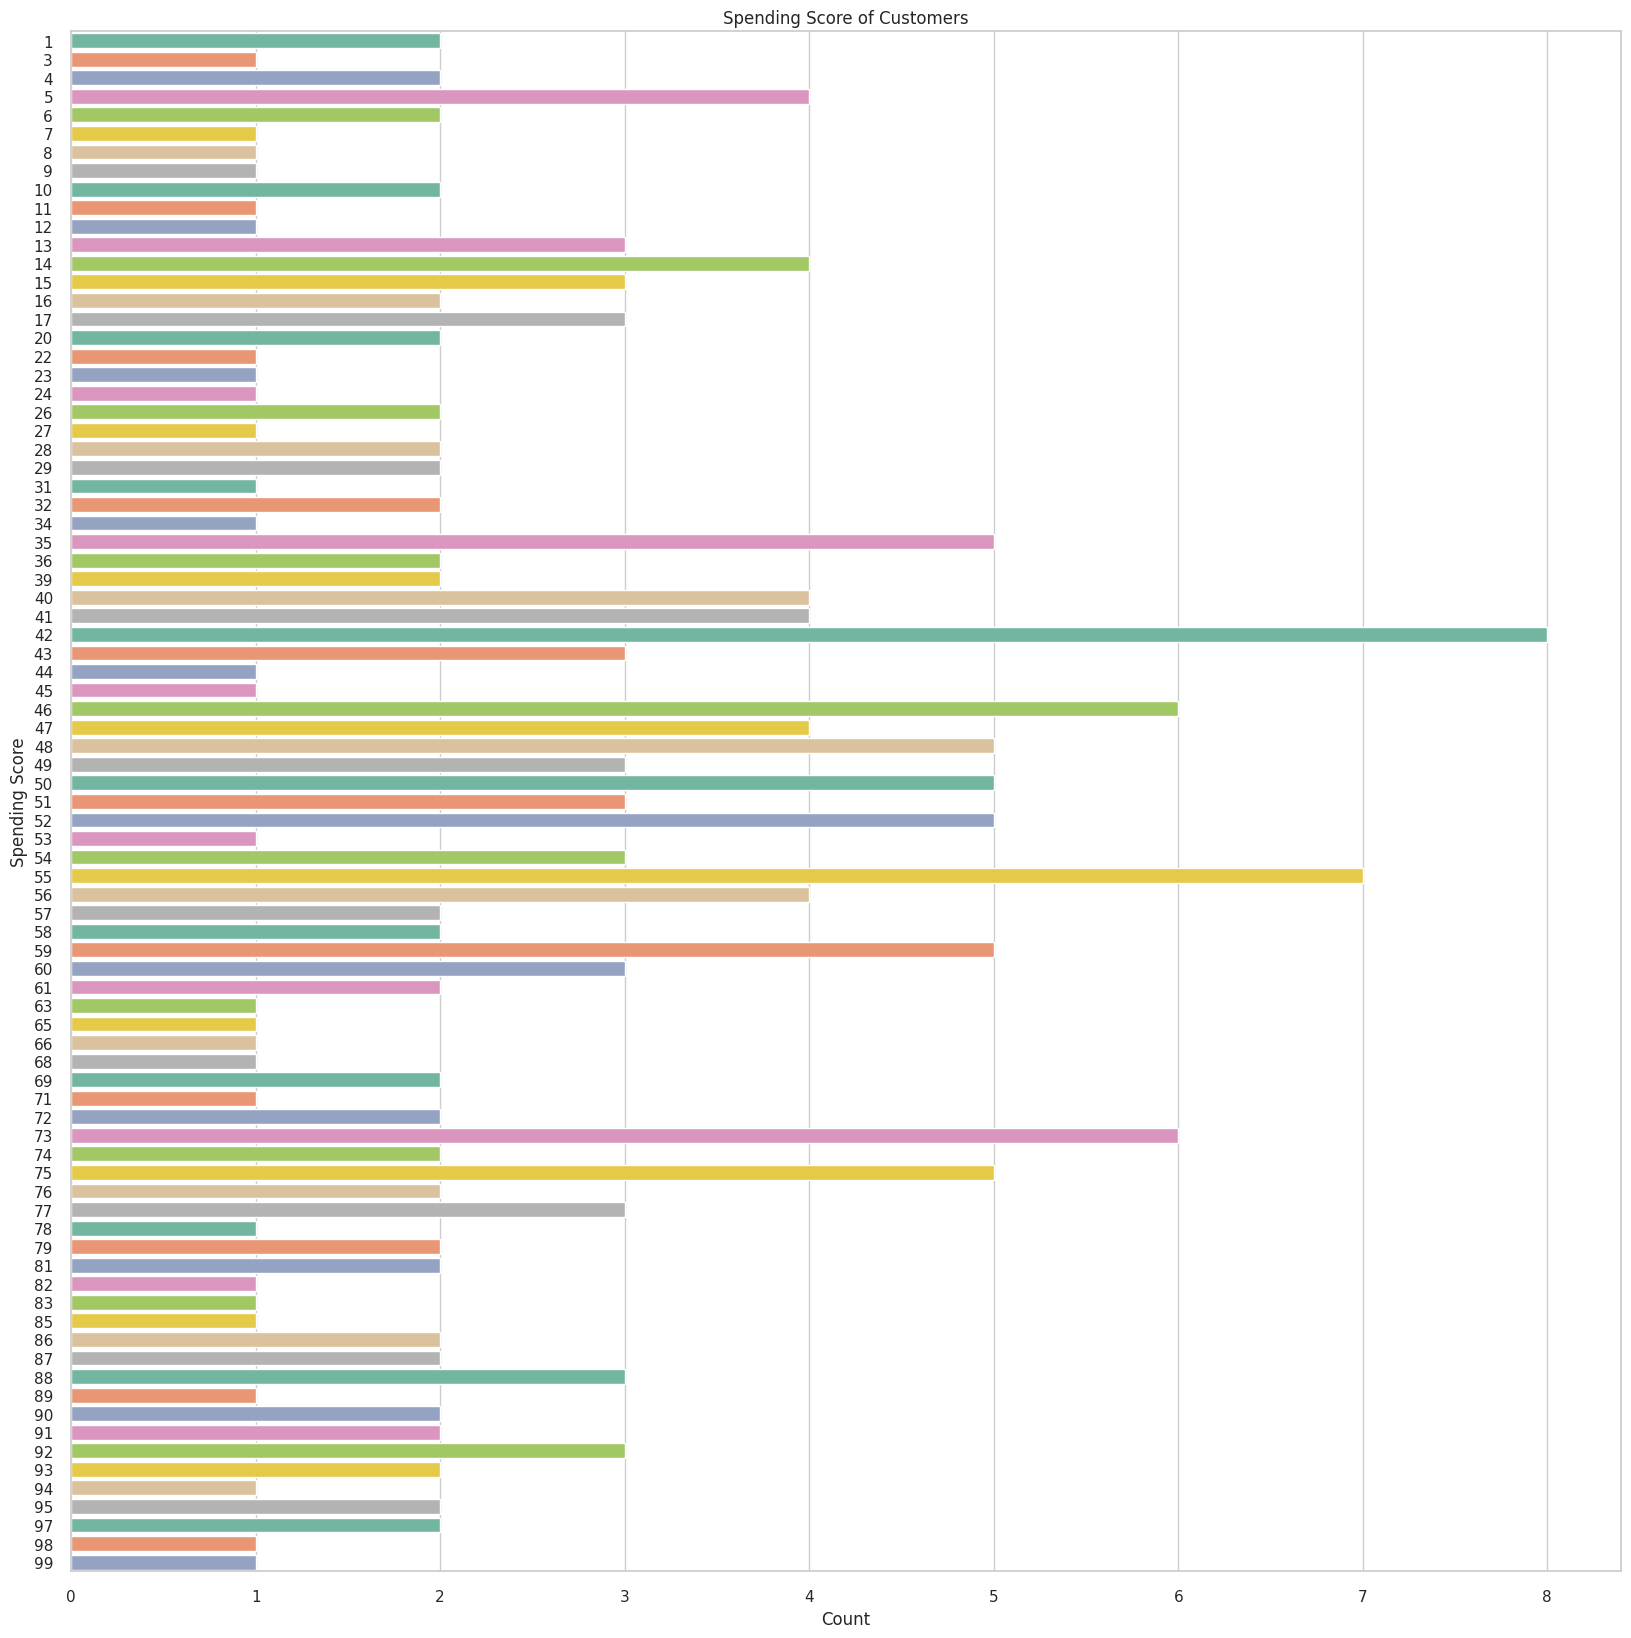

In [331]:
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")
sns.countplot(data= df3, y="Spending Score", palette="Set2")

plt.title("Spending Score of Customers")
plt.xlabel("Count")
plt.ylabel("Spending Score")

plt.show()

In [333]:
df3["clusterr"] = kmeans.fit_predict(df3)
df3

,Annual_Income,Spending Score,clusterr
0,15,39,4
1,15,81,0
2,16,6,7
3,16,77,0
4,17,40,4
...,...,...,...
193,113,91,5
194,120,16,8
195,120,79,5
196,126,28,8


In [335]:
clu_ava = df3.groupby("clusterr").mean()
clu_ava

,Annual_Income,Spending Score
clusterr,,
0,25.095238,80.047619
1,63.720930,46.162791
2,78.035714,81.892857
3,48.100000,52.675000
4,30.000000,34.615385
5,105.300000,82.700000
6,80.181818,12.681818
7,24.583333,9.583333
8,106.666667,22.444444


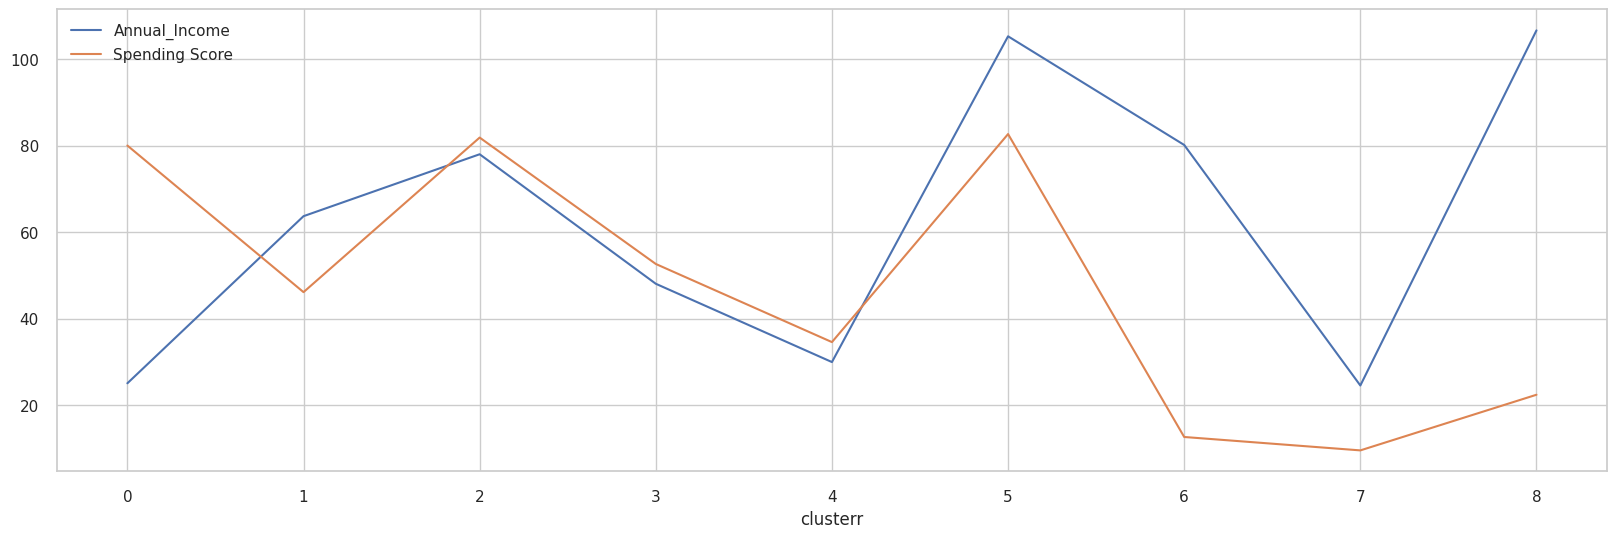

In [336]:
ax = clu_ava.plot(kind='line', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f");

<Axes: xlabel='clusterr', ylabel='Annual_Income'>

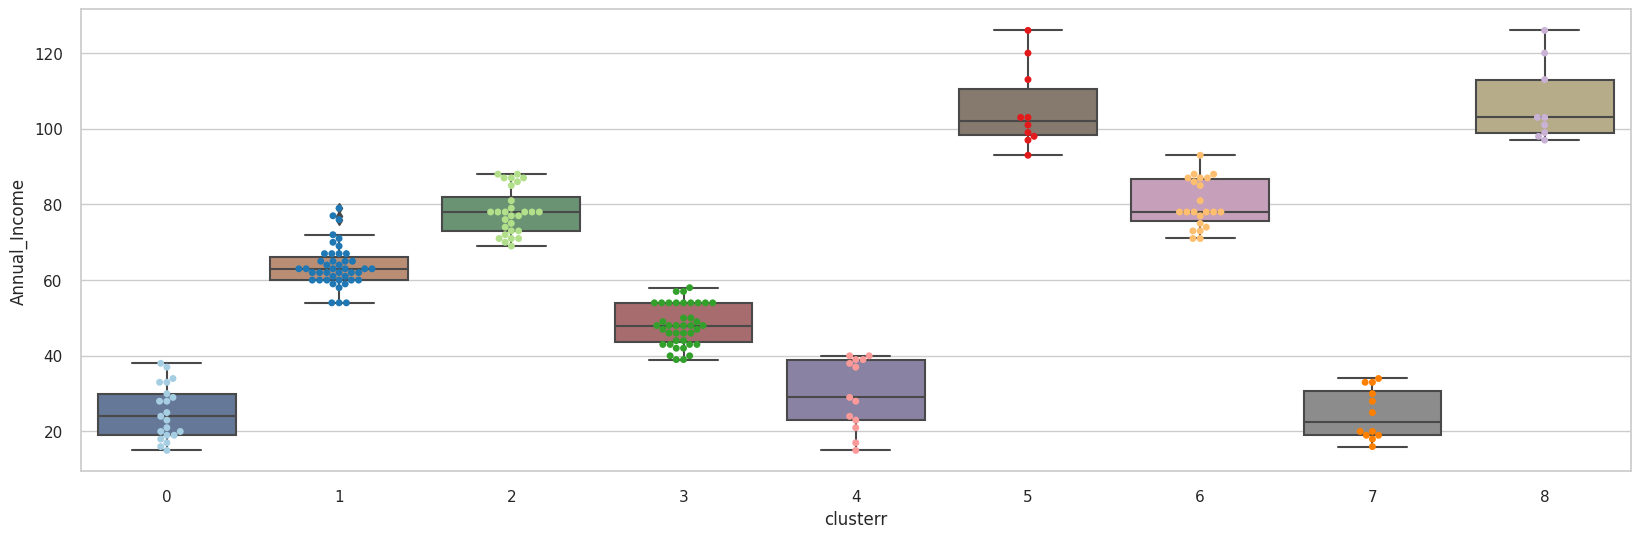

In [337]:
plt.figure(figsize = (20,6))
sns.boxplot(y="Annual_Income", x="clusterr", data = df3,palette="deep",saturation=0.5)
sns.swarmplot(y = "Annual_Income", x = "clusterr", data = df3,palette=sns.color_palette("Paired"))

<Axes: xlabel='clusterr', ylabel='Spending Score'>

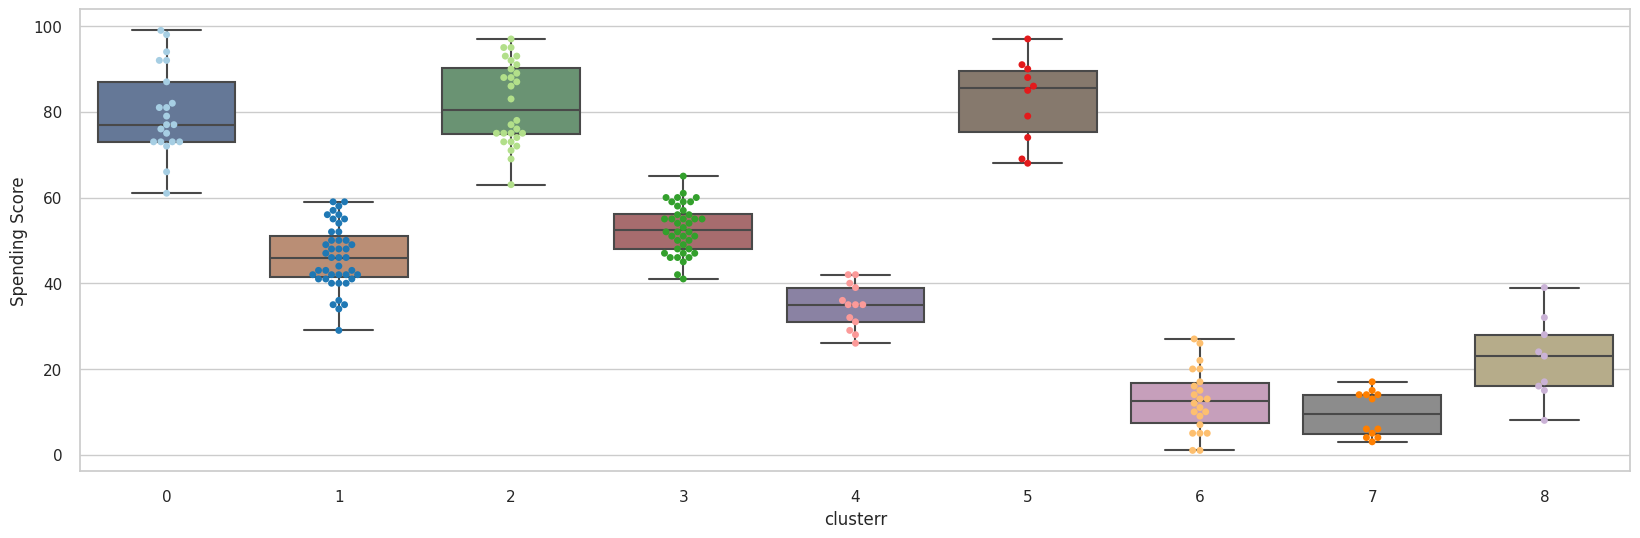

In [338]:
plt.figure(figsize = (20,6))
sns.boxplot(y="Spending Score", x="clusterr", data = df3,palette="deep",saturation=0.5)
sns.swarmplot(y = "Spending Score", x = "clusterr", data = df3,palette=sns.color_palette("Paired"))

## Conclusion

cluster 0 : The average Annual Income is around 25, where the avarge Spending Score is around 80.

cluster 1: The average Annual Income is around 63, where the avarge Spending Score is around 46.

cluster 2 : The average Annual Income is around 78, where the avarge Spending Score is around 81.

cluster 3: The average Annual Income is around 48, where the avarge Spending Score is around 52.

cluster 4: The average Annual Income is around 30, where the avarge Spending Score is around 34.

cluster 5: The average Annual Income is around 105, where the avarge Spending Score is around 82.

cluster 6: The average Annual Income is around 80, where the avarge Spending Score is around 12.

cluster 7: The average Annual Income is around 24, where the avarge Spending Score is around 9.

cluster 8: The average Annual Income is around 106, where the avarge Spending Score is around 22.

<Axes: >

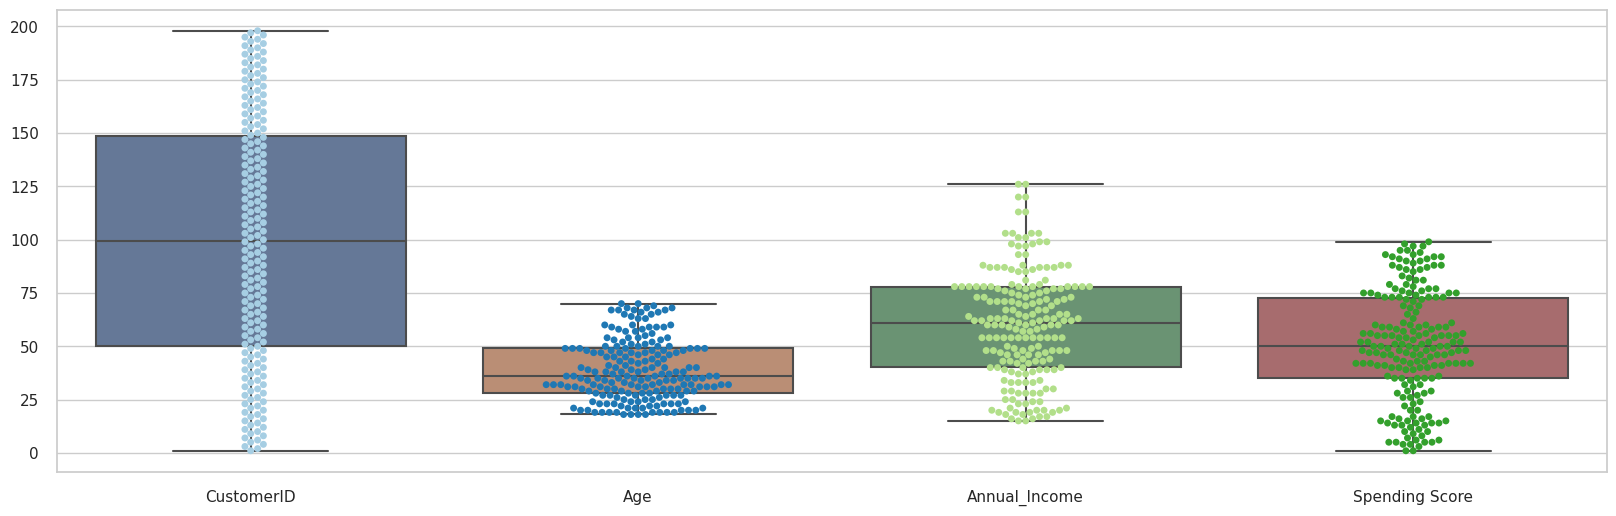

In [339]:
plt.figure(figsize = (20,6))
sns.boxplot(data = df,palette="deep",saturation=0.5)
sns.swarmplot(data = df,palette=sns.color_palette("Paired"))



```
# This is formatted as code
```




___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a84edac-0c18-40c0-b96e-7bf5338c7645' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>